# **EDA 및 데이터 정제**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
real_path = '/content/drive/MyDrive/fakenews/BuzzFeed_real_news_content.csv'
real_news = pd.read_csv(real_path)
real_news.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


In [ ]:
fake_path = '/content/drive/MyDrive/fakenews/BuzzFeed_fake_news_content.csv'
fake_news = pd.read_csv(fake_path)
fake_news.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


In [ ]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              91 non-null     object
 1   title           91 non-null     object
 2   text            91 non-null     object
 3   url             91 non-null     object
 4   top_img         91 non-null     object
 5   authors         84 non-null     object
 6   source          91 non-null     object
 7   publish_date    56 non-null     object
 8   movies          4 non-null      object
 9   images          91 non-null     object
 10  canonical_link  90 non-null     object
 11  meta_data       91 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              91 non-null     object
 1   title           91 non-null     object
 2   text            91 non-null     object
 3   url             83 non-null     object
 4   top_img         81 non-null     object
 5   authors         57 non-null     object
 6   source          83 non-null     object
 7   publish_date    77 non-null     object
 8   movies          21 non-null     object
 9   images          81 non-null     object
 10  canonical_link  80 non-null     object
 11  meta_data       91 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [ ]:
real_news.isnull().sum()

id                 0
title              0
text               0
url                0
top_img            0
authors            7
source             0
publish_date      35
movies            87
images             0
canonical_link     1
meta_data          0
dtype: int64

In [ ]:
fake_news.isnull().sum()

id                 0
title              0
text               0
url                8
top_img           10
authors           34
source             8
publish_date      14
movies            70
images            10
canonical_link    11
meta_data          0
dtype: int64

In [ ]:
real_news.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
count,91,91,91,91,91,84,91,56,4,91,90,91
unique,91,91,91,91,87,65,14,53,4,90,90,91
top,Real_57-Webpage,Sacramento mayor punches pie thrower,One Critically Wounded As Charlotte Police End...,http://rightwingnews.com/top-news/charlotte-po...,http://static.politico.com/da/f5/44342c424c68b...,"Jack Shafer,Louis Nelson",http://politi.co,{'$date': 1474934400000},https://www.youtube.com/embed/RI42hai7uM8?feat...,http://static.politico.com/da/f5/44342c424c68b...,http://abcnews.go.com/Politics/joe-biden-slams...,"{""description"": ""&quot;He didn't ask her about..."
freq,1,1,1,1,3,5,32,2,1,2,1,1


In [ ]:
fake_news.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
count,91,91,91,83,81,57,83,77,21,81,80,91
unique,91,87,87,80,79,30,22,69,21,79,78,81
top,Fake_84-Webpage,Clinton Foundation Spent 5.7% on Charity; Rest...,After collapsing just before trying to step in...,http://www.proudcons.com/clinton-foundation-ca...,http://eaglerising.com/wp-content/uploads/2016...,Terresa Monroe-hamilton,http://rightwingnews.com,{'$date': 1474588800000},https://www.youtube.com/embed/ThwaDSaoGU8?feat...,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36847/clinton-foundatio...,{}
freq,1,2,2,2,2,6,17,4,1,2,2,8


In [ ]:
'''plt.figure(figsize=(20,6))
for i, col in zip(range(1,10),list(real_news)[3:]):
  plt.subplot(3,4,i)
  sns.countplot(y=col , data=real_news, order = real_news[col].value_counts().index)
  plt.xlabel('Count',fontsize=12)
  plt.ylabel(col,fontsize=12)
  plt.title('Real News',fontsize=15)
  plt.show()'''

"plt.figure(figsize=(20,6))\nfor i, col in zip(range(1,10),list(real_news)[3:]):\n  plt.subplot(3,4,i)\n  sns.countplot(y=col , data=real_news, order = real_news[col].value_counts().index)\n  plt.xlabel('Count',fontsize=12)\n  plt.ylabel(col,fontsize=12)\n  plt.title('Real News',fontsize=15)\n  plt.show()"

In [ ]:
'''plt.figure(figsize=(20,6))
for i, col in zip(range(1,10),list(fake_news)[3:]):
  plt.subplot(3,4,i)
  sns.countplot(y=col , data=fake_news, order = fake_news[col].value_counts().index)
  plt.xlabel('Count',fontsize=12)
  plt.ylabel(col,fontsize=12)
  plt.title('Fake News',fontsize=15)
  plt.show()'''

"plt.figure(figsize=(20,6))\nfor i, col in zip(range(1,10),list(fake_news)[3:]):\n  plt.subplot(3,4,i)\n  sns.countplot(y=col , data=fake_news, order = fake_news[col].value_counts().index)\n  plt.xlabel('Count',fontsize=12)\n  plt.ylabel(col,fontsize=12)\n  plt.title('Fake News',fontsize=15)\n  plt.show()"

In [ ]:
df=pd.concat([real_news,fake_news],axis=0)
df['news_type']=df['id'].apply(lambda x: x.split('_')[0])
df.index = list(range(0,182))
df.tail()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
177,Fake_88-Webpage,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,http://rightwingnews.com/hillary-clinton-2/hil...,http://rightwingnews.com/wp-content/uploads/20...,Terresa Monroe-hamilton,http://rightwingnews.com,{'$date': 1474912025000},NaN,http://1.gravatar.com/avatar/d35b77ff6c3900715...,http://rightwingnews.com/hillary-clinton-2/hil...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",Fake
178,Fake_89-Webpage,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,http://conservativetribune.com/lester-holt-lie...,http://conservativetribune.com/wp-content/uplo...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,{'$date': 1474934400000},https://www.youtube.com/embed/ThwaDSaoGU8?feat...,http://conservativetribune.com/wp-content/uplo...,http://conservativetribune.com/lester-holt-lie...,"{""description"": ""People are already calling th...",Fake
179,Fake_9-Webpage,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,http://clashdaily.com/2016/09/dear-cnn-ap-2004...,http://clashdaily.com/wp-content/uploads/2016/...,"Rich Witmer,Doug Giles",http://clashdaily.com,{'$date': 1474207108000},NaN,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,http://clashdaily.com/2016/09/dear-cnn-ap-2004...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",Fake
180,Fake_90-Webpage,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,http://www.thepoliticalinsider.com/first-presi...,http://assets.thepoliticalinsider.com.s3.amazo...,NaN,http://www.thepoliticalinsider.com,{'$date': 1475000011000},NaN,http://1.gravatar.com/avatar/71be986d321b3d520...,http://thepoliticalinsider.com/first-president...,"{""description"": ""One thing that has baffled ma...",Fake
181,Fake_91-Webpage,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,http://rightwingnews.com/top-news/people-notic...,http://rightwingnews.com/wp-content/uploads/20...,Lisa Smith,http://rightwingnews.com,{'$date': 1475010040000},NaN,http://0.gravatar.com/avatar/3728144c20aefded7...,http://rightwingnews.com/top-news/people-notic...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",Fake


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              182 non-null    object
 1   title           182 non-null    object
 2   text            182 non-null    object
 3   url             174 non-null    object
 4   top_img         172 non-null    object
 5   authors         141 non-null    object
 6   source          174 non-null    object
 7   publish_date    133 non-null    object
 8   movies          25 non-null     object
 9   images          172 non-null    object
 10  canonical_link  170 non-null    object
 11  meta_data       182 non-null    object
 12  news_type       182 non-null    object
dtypes: object(13)
memory usage: 19.9+ KB


In [ ]:
df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Real_57-Webpage,Clinton Foundation Spent 5.7% on Charity; Rest...,Back when the news first broke about the pay-t...,http://eaglerising.com/36880/a-hillary-clinton...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/D0DMOBBOJ0U,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36847/clinton-foundatio...,{},Fake
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


In [ ]:
df.isnull().sum()

id                  0
title               0
text                0
url                 8
top_img            10
authors            41
source              8
publish_date       49
movies            157
images             10
canonical_link     12
meta_data           0
news_type           0
dtype: int64

In [ ]:
df['authors'].head()

0                     View All Posts,Leonora Cravotta
1         More Candace,Adam Kelsey,Abc News,More Adam
2                                         Cassy Fiano
3          Jack Shafer,Erick Trickey,Zachary Karabell
4    John Parkinson,More John,Abc News,More Alexander
Name: authors, dtype: object

In [ ]:
'''plt.figure(figsize=(20,6))
for i, col in zip(range(1,10),list(df)[3:]):
  plt.subplot(3,4,i)
  sns.countplot(y=col , data=df, hue='news_type', order = df[col].value_counts().index)
  plt.xlabel('Count',fontsize=12)
  plt.ylabel(col,fontsize=12)
  plt.title('News',fontsize=15)
  plt.show()'''

"plt.figure(figsize=(20,6))\nfor i, col in zip(range(1,10),list(df)[3:]):\n  plt.subplot(3,4,i)\n  sns.countplot(y=col , data=df, hue='news_type', order = df[col].value_counts().index)\n  plt.xlabel('Count',fontsize=12)\n  plt.ylabel(col,fontsize=12)\n  plt.title('News',fontsize=15)\n  plt.show()"

In [ ]:
df = df.drop(['id','url','top_img','publish_date','canonical_link','meta_data'],axis=1)
df.head()

,title,text,authors,source,movies,images,news_type
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,NaN,http://constitution.com/wp-content/uploads/201...,Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,http://www.googleadservices.com/pagead/convers...,Real
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,Real
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,NaN,https://static.politico.com/dims4/default/8a1c...,Real
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,http://www.googleadservices.com/pagead/convers...,Real


In [ ]:
'''plt.figure(figsize=(10,15))
sns.countplot(y='authors' , data=df, hue='news_type', order = df['authors'].value_counts().index)
plt.xlabel('Count',fontsize=12)
plt.ylabel('authors',fontsize=12)
plt.title('News',fontsize=15)
plt.show()'''

"plt.figure(figsize=(10,15))\nsns.countplot(y='authors' , data=df, hue='news_type', order = df['authors'].value_counts().index)\nplt.xlabel('Count',fontsize=12)\nplt.ylabel('authors',fontsize=12)\nplt.title('News',fontsize=15)\nplt.show()"

In [ ]:
'''plt.figure(figsize=(10,10))
sns.countplot(y='source' , data=df, hue='news_type', order = df['source'].value_counts().index)
plt.xlabel('Count',fontsize=12)
plt.ylabel('source',fontsize=12)
plt.title('News',fontsize=15)
plt.show()'''

"plt.figure(figsize=(10,10))\nsns.countplot(y='source' , data=df, hue='news_type', order = df['source'].value_counts().index)\nplt.xlabel('Count',fontsize=12)\nplt.ylabel('source',fontsize=12)\nplt.title('News',fontsize=15)\nplt.show()"

In [ ]:
'''plt.figure(figsize=(10,20))
sns.countplot(y='images' , data=df, hue='news_type', order = df['images'].value_counts().index)
plt.xlabel('Count',fontsize=12)
plt.ylabel('images',fontsize=12)
plt.title('News',fontsize=15)
plt.show()'''

"plt.figure(figsize=(10,20))\nsns.countplot(y='images' , data=df, hue='news_type', order = df['images'].value_counts().index)\nplt.xlabel('Count',fontsize=12)\nplt.ylabel('images',fontsize=12)\nplt.title('News',fontsize=15)\nplt.show()"

In [ ]:
df['contain_movies']=df['movies'].apply(lambda x: 0 if str(x)=='nan' else 1)
df.drop(['movies'],axis=1,inplace=True)
df = df[['title','text','authors','source','contain_movies','images','news_type']]
df.tail(10)

,title,text,authors,source,contain_movies,images,news_type
172,EXPOSED: Soros Funding Fake Veterans’ PAC To T...,EXPOSED: Soros Funding Fake Veterans’ PAC To T...,Tiffiny Ruegner,http://rightwingnews.com,0,http://rightwingnews.com/wp-content/uploads/wo...,Fake
173,OUTRAGE! Obama Spends $770M Dollars In Tax Pay...,OUTRAGE! Obama Spends $770M Dollars In Tax Pay...,Terresa Monroe-hamilton,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/wo...,Fake
174,BOOM! Marines Send TERRORISTS Scathing Message...,BOOM! Marines Send TERRORISTS Scathing Message...,Cassy Fiano,http://rightwingnews.com,1,http://pixel.quantserve.com/pixel/p-RS38vHsezm...,Fake
175,BOOM! Charlotte Officials FINALLY Silence Riot...,BOOM! Charlotte Officials FINALLY Silence Riot...,Cassy Fiano,http://rightwingnews.com,1,http://pixel.quantserve.com/pixel/p-RS38vHsezm...,Fake
176,BREAKING: Steps to FORCE FBI Director Comey to...,BREAKING: Steps to FORCE FBI Director Comey to...,Cassy Fiano,http://rightwingnews.com,0,http://rightwingnews.com/wp-content/uploads/20...,Fake
177,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,Terresa Monroe-hamilton,http://rightwingnews.com,0,http://1.gravatar.com/avatar/d35b77ff6c3900715...,Fake
178,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,1,http://conservativetribune.com/wp-content/uplo...,Fake
179,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,"Rich Witmer,Doug Giles",http://clashdaily.com,0,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,Fake
180,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,NaN,http://www.thepoliticalinsider.com,0,http://1.gravatar.com/avatar/71be986d321b3d520...,Fake
181,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,Lisa Smith,http://rightwingnews.com,0,http://0.gravatar.com/avatar/3728144c20aefded7...,Fake


In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GDBScore.csv')
df_ = df_.drop('Unnamed: 0',axis=1)
df_

,in_out_degree,clustering_coef,user_credibility
0,0.766990,0.178493,0.35
1,0.797183,0.082105,1.13
2,0.649110,0.109048,0.97
3,1.225374,0.245842,0.31
4,0.676302,0.112470,0.98
...,...,...,...
177,0.787237,0.109145,0.27
178,0.684159,0.097021,0.11
179,0.789346,0.126465,0.04
180,0.708119,0.123283,0.03


In [ ]:
df = pd.concat([df,df_],axis=1)
df = df[['title','text','authors','source','contain_movies','images','in_out_degree','clustering_coef','user_credibility','news_type']]
df.head()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real


In [ ]:
df = df.fillna(0.5)
df.isnull().sum()

title               0
text                0
authors             0
source              0
contain_movies      0
images              0
in_out_degree       0
clustering_coef     0
user_credibility    0
news_type           0
dtype: int64

## 자연어 처리 EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### title 관련

####길이 분포

Text(0.5, 1.0, 'Length of Titles')

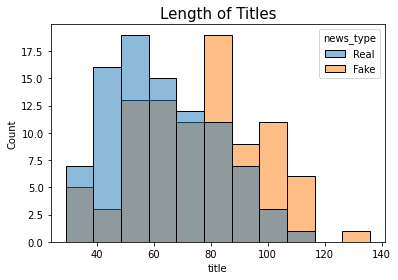

In [ ]:
sns.histplot(data=df, x=df['title'].str.len(),hue='news_type')
plt.title('Length of Titles', fontsize=15)

Text(0.5, 1.0, 'Length of Titles')

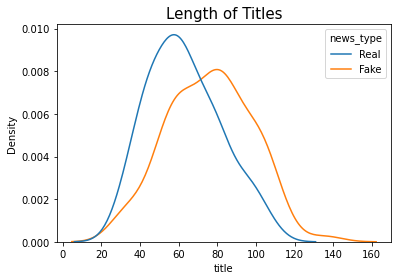

In [ ]:
sns.kdeplot(data=df, x=df['title'].str.len(),hue='news_type')
plt.title('Length of Titles', fontsize=15)

Text(0, 0.5, 'frequency')

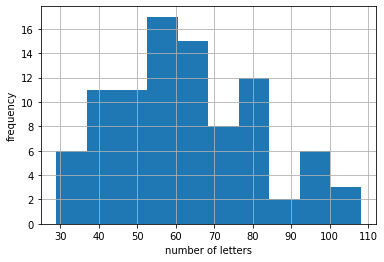

In [ ]:
ax = real_news['title'].str.len().hist() 
ax.set_xlabel('number of letters') 
ax.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

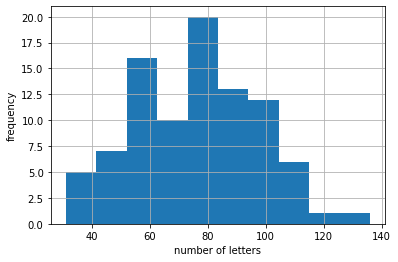

In [ ]:
ax = fake_news['title'].str.len().hist() 
ax.set_xlabel('number of letters') 
ax.set_ylabel('frequency')

#### 토큰 수 분포


Text(0.5, 1.0, 'Number of Tokens')

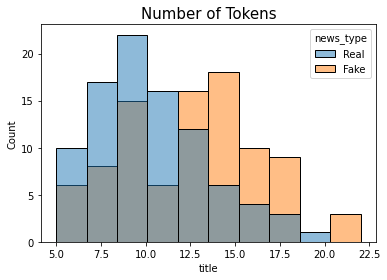

In [ ]:
sns.histplot(data=df, x=df['title'].str.split().map(lambda x: len(x)),hue='news_type')
plt.title('Number of Tokens', fontsize=15)

Text(0.5, 1.0, 'Number of Tokens')

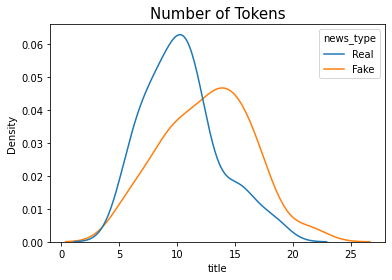

In [ ]:
sns.kdeplot(data=df, x=df['title'].str.split().map(lambda x: len(x)),hue='news_type')
plt.title('Number of Tokens', fontsize=15)

Text(0, 0.5, 'frequency')

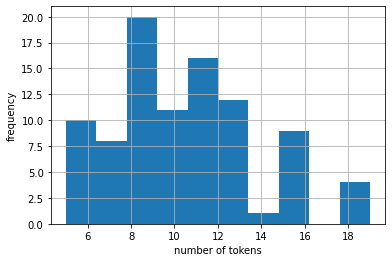

In [ ]:
ax = real_news['title'].str.split().map(lambda x: len(x)).hist() 
ax.set_xlabel('number of tokens') 
ax.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

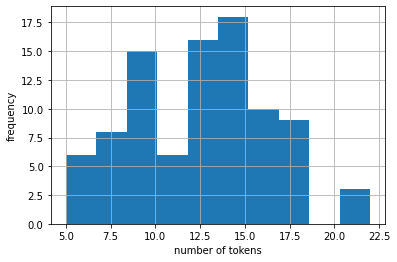

In [ ]:
ax = fake_news['title'].str.split().map(lambda x: len(x)).hist() 
ax.set_xlabel('number of tokens') 
ax.set_ylabel('frequency')

#### 토큰별 길이 분포

Text(0.5, 1.0, 'Average of Token length')

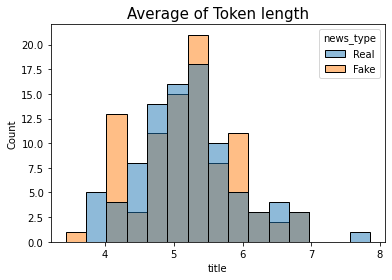

In [ ]:
sns.histplot(data=df, x=df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),hue='news_type')
plt.title('Average of Token length', fontsize=15)

Text(0.5, 1.0, 'Average of Token length')

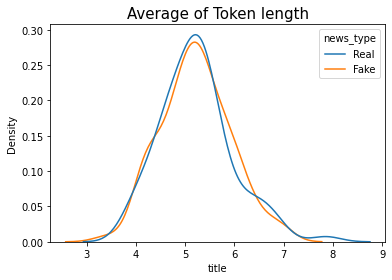

In [ ]:
sns.kdeplot(data=df, x=df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),hue='news_type')
plt.title('Average of Token length', fontsize=15)

Text(0, 0.5, 'frequency')

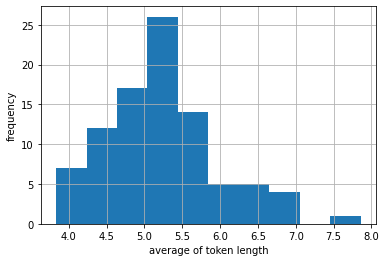

In [ ]:
ax = real_news['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist() 

ax.set_xlabel('average of token length') 
ax.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

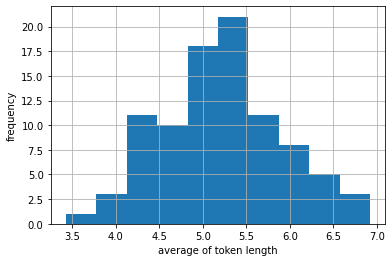

In [ ]:
ax = fake_news['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist() 

ax.set_xlabel('average of token length') 
ax.set_ylabel('frequency')

#### Nltk를 이용한 통계

#####명사 통계

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import collections 
import seaborn as sns 
import matplotlib.pyplot as plt 

def print_noun__freq_chart(data):
  titles = data['title'].to_list()
  n_corpus = [] 

  for t in titles:
    tokens = pos_tag(word_tokenize(t.lower()))

    for token in tokens:
      if token[1] in ['NN','NNP'] and len(token[0]) >=2:
        n_corpus.append(token[0])

  count = collections.Counter(n_corpus) 
  most = count.most_common() #빈도 수 순으로 추출 

  x, y= [], [] 

  for word,count in most[:40]: 
      x.append(word) 
      y.append(count) 

  plt.figure(figsize=(10,10)) 
  sns.barplot(x=y,y=x)

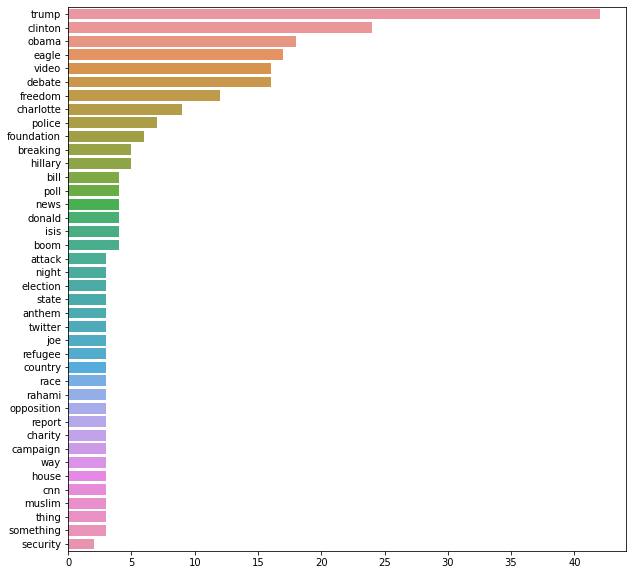

In [ ]:
print_noun__freq_chart(df)

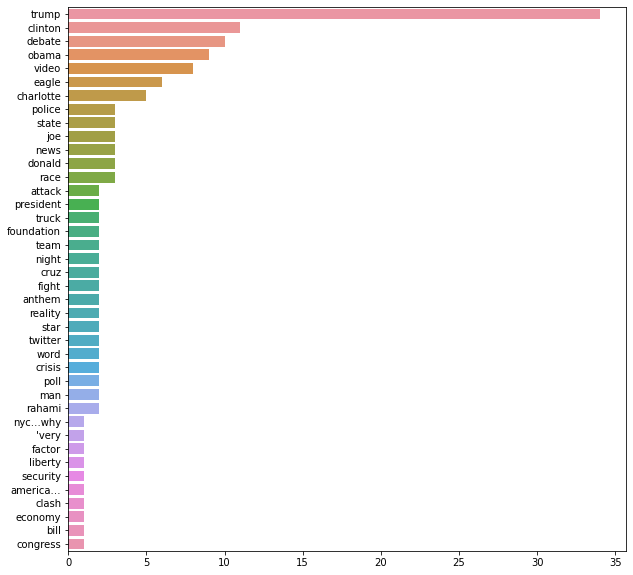

In [ ]:
print_noun__freq_chart(real_news)

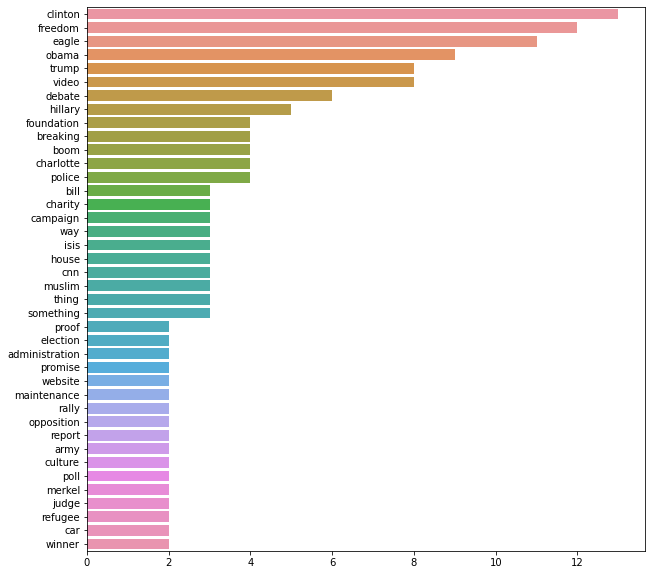

In [ ]:
print_noun__freq_chart(fake_news)

##### 품사별 통계

In [ ]:
def print_pos_chart(data):
  tags = [] 
  titles = data['title'].to_list()

  for t in titles:
    tokens = pos_tag(word_tokenize(t.lower()))
    for token in tokens:
      if len(token[1])>1:
        tags.append(token[1])

  counter=collections.Counter(tags) 
  x,y=list(map(list,zip(*counter.most_common(10)))) 
  ax = sns.barplot(x=y,y=x) 
  ax.set(xlabel = 'Frequency', ylabel = 'Part of speech')

 더 자세히는 https://happygrammer.github.io/nlp/postag-set/
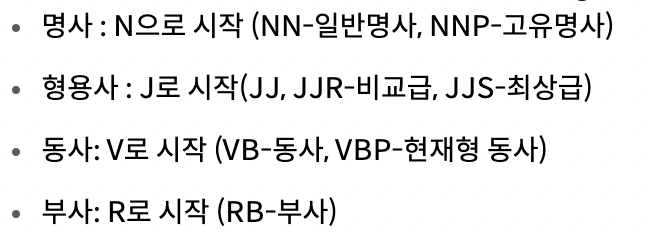

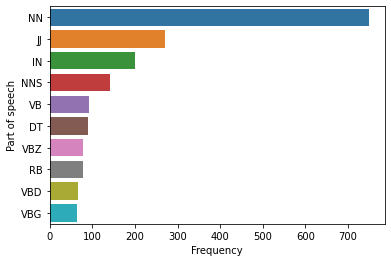

In [ ]:
print_pos_chart(df)

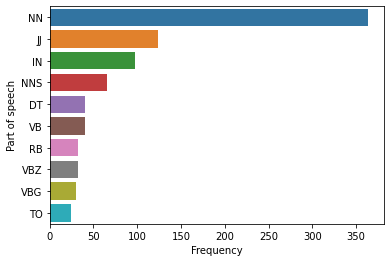

In [ ]:
print_pos_chart(real_news)

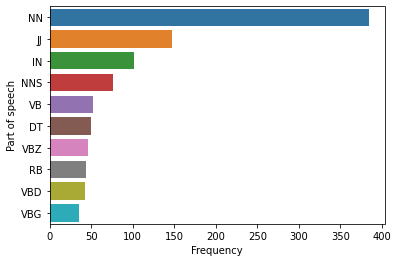

In [ ]:
print_pos_chart(fake_news)

### text 관련

####길이 분포

Text(0.5, 1.0, 'Length of Titles')

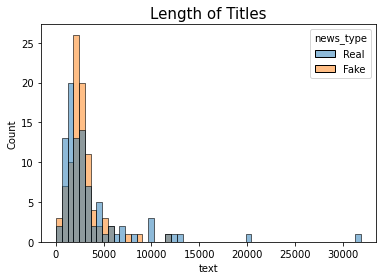

In [ ]:
sns.histplot(data=df, x=df['text'].str.len(),hue='news_type')
plt.title('Length of Titles', fontsize=15)

Text(0, 0.5, 'frequency')

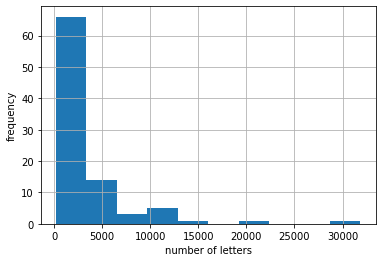

In [ ]:
ax = real_news['text'].str.len().hist() 
ax.set_xlabel('number of letters') 
ax.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

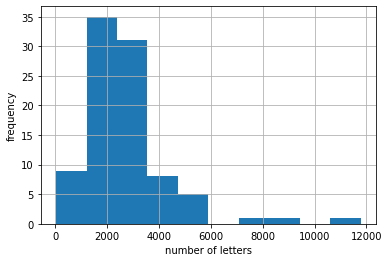

In [ ]:
ax = fake_news['text'].str.len().hist() 
ax.set_xlabel('number of letters') 
ax.set_ylabel('frequency')

#### 토큰 수 분포


Text(0.5, 1.0, 'Number of Tokens')

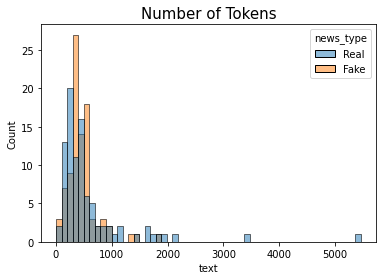

In [ ]:
sns.histplot(data=df, x=df['text'].str.split().map(lambda x: len(x)),hue='news_type')
plt.title('Number of Tokens', fontsize=15)

Text(0, 0.5, 'frequency')

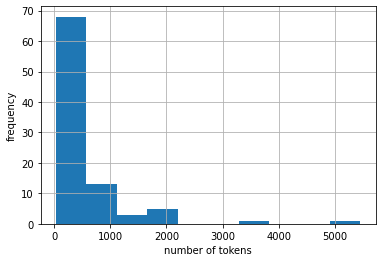

In [ ]:
ax = real_news['text'].str.split().map(lambda x: len(x)).hist() 
ax.set_xlabel('number of tokens') 
ax.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

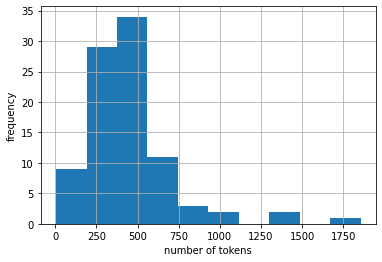

In [ ]:
ax = fake_news['text'].str.split().map(lambda x: len(x)).hist() 
ax.set_xlabel('number of tokens') 
ax.set_ylabel('frequency')

#### 토큰별 길이 분포

Text(0.5, 1.0, 'Average of Token length')

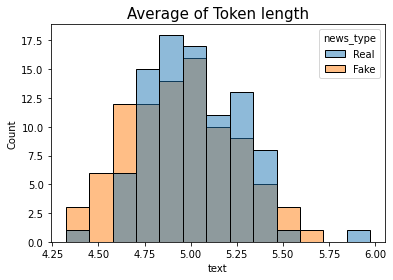

In [ ]:
sns.histplot(data=df, x=df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),hue='news_type')
plt.title('Average of Token length', fontsize=15)

Text(0, 0.5, 'frequency')

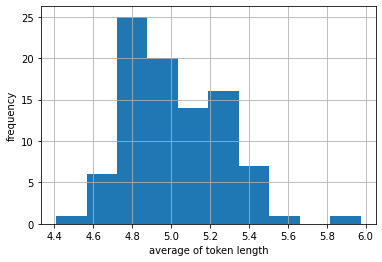

In [ ]:
ax = real_news['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist() 

ax.set_xlabel('average of token length') 
ax.set_ylabel('frequency')

Text(0, 0.5, 'frequency')

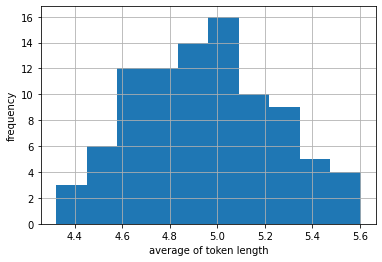

In [ ]:
ax = fake_news['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist() 

ax.set_xlabel('average of token length') 
ax.set_ylabel('frequency')

#### Nltk를 이용한 통계

#####동사 통계

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer  
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')

import collections 
import seaborn as sns 
import matplotlib.pyplot as plt 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def make_token_df(df):

  token_list = []
  for text in df['text']:
    tagged_list = pos_tag(WordPunctTokenizer().tokenize(text.lower()))
    t_list = [t[0] for t in tagged_list if t[1].startswith("V") or t[1].startswith("R") or t[1].startswith("J")]
    token_list.append(t_list)

  token_list = sum(token_list, [])

  stop_words = set(stopwords.words('english')) 
  result = []
  for w in token_list: 
      if w not in stop_words and w.isalpha(): 
          result.append(w)

  count = collections.Counter(result) 
  most = count.most_common() #빈도 수 순으로 추출 

  x, y= [], [] 

  for word,count in most[:50]: 
      x.append(word) 
      y.append(count) 

  token_df = pd.DataFrame()
  token_df['word'] = x
  token_df["count"] = y

  return token_df

In [ ]:
rn = make_token_df(real_news)
fn = make_token_df(fake_news)

rn.columns = ['word','Real News']
fn.columns = ['word','Fake News']

In [ ]:
vrj = pd.merge(rn, fn, how='outer')
vrj = vrj.fillna(0)
vrj

,word,Real News,Fake News
0,said,348.0,99.0
1,new,128.0,70.0
2,know,104.0,85.0
3,hillary,100.0,208.0
4,also,95.0,75.0
...,...,...,...
57,real,0.0,26.0
58,actually,0.0,26.0
59,islamic,0.0,25.0
60,went,0.0,24.0


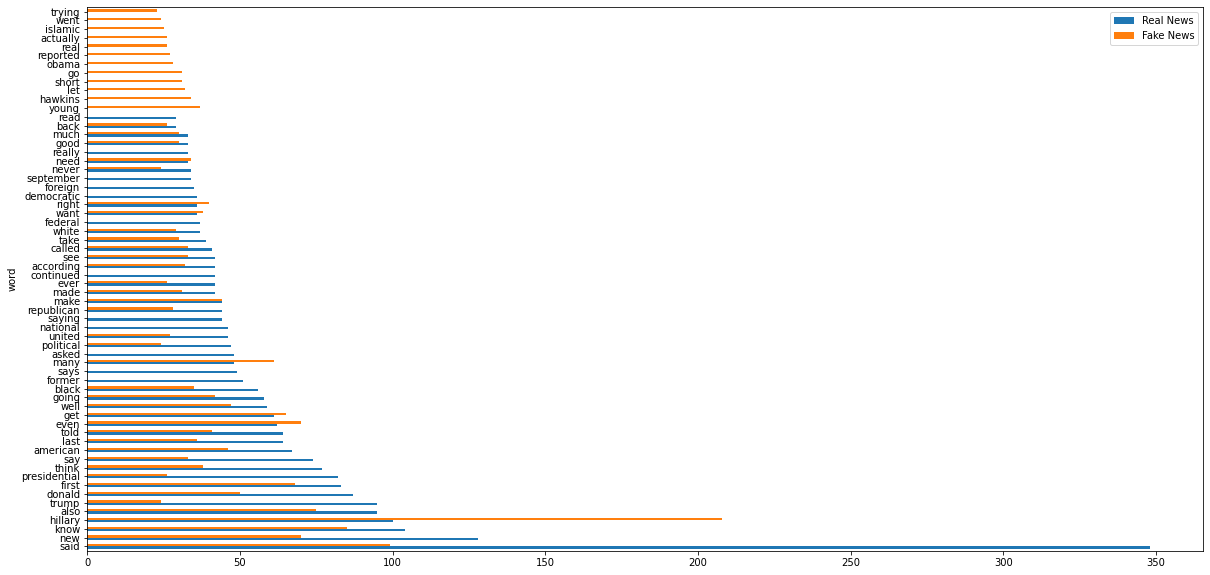

In [ ]:
vrj.plot(kind="barh", x= 'word', figsize = (20,10))

##### 품사별 통계

In [ ]:
def print_pos_chart(data):
  tags = [] 
  titles = data['text'].to_list()

  for t in titles:
    tokens = pos_tag(word_tokenize(t.lower()))
    for token in tokens:
      if len(token[1])>1:
        tags.append(token[1])

  counter=collections.Counter(tags) 
  x,y=list(map(list,zip(*counter.most_common(10)))) 
  ax = sns.barplot(x=y,y=x) 
  ax.set(xlabel = 'Frequency', ylabel = 'Part of speech')

 더 자세히는 https://happygrammer.github.io/nlp/postag-set/
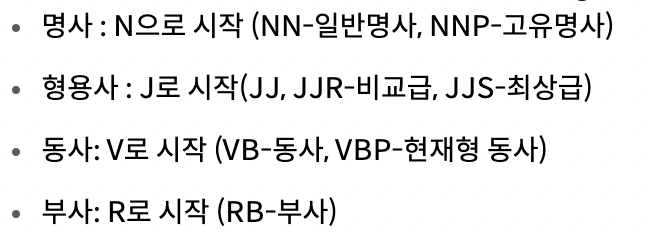

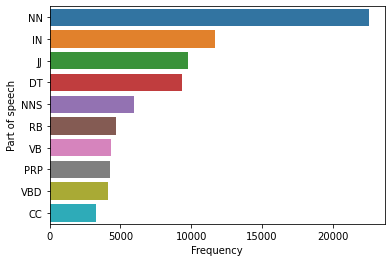

In [ ]:
print_pos_chart(df)

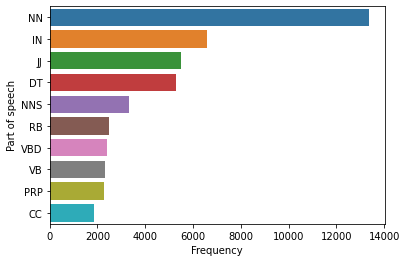

In [ ]:
print_pos_chart(real_news)

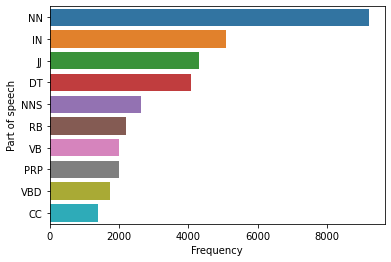

In [ ]:
print_pos_chart(fake_news)

#**변수 수치화**

## Author

In [ ]:
#코드 합칠 때는 위에 있으면 버리기
df.index = list(range(0,182))

In [ ]:
author_list = list(df['authors'])   
append_list = []

for i in range(0,len(df)):
  if type(author_list[i]) == str:           #결측치가 아닌 경우 ,를 기준으로 split한 뒤 More로 시작하는 기자를 제외한 모든 기자를 임시 리스트에 저장
    temp = author_list[i].split(",")
    a_list = [item for item in temp if not item.startswith('More')]
    if a_list == []:                        #More을 제거한 뒤 빈 리스트가 된 경우를 고려해 0을 append
      append_list.append(0.5)
    else:
      append_list.append(a_list)            #빈 리스트가 아닌 경우 임시 리스트를 append할 list에 추가
  else:
    append_list.append(author_list[i])      #결측치인 경우 0을 그대로 append

df['new_authors'] = append_list             #데이터프레임에 새로운 열을 만들어 추가. 결과물은 [기자1,기자2,기자3] or 0일 것임.

In [ ]:
df.head() #More ~ 은 제거됨

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real,"[View All Posts, Leonora Cravotta]"
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real,"[Adam Kelsey, Abc News]"
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real,[Cassy Fiano]
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real,"[Jack Shafer, Erick Trickey, Zachary Karabell]"
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real,"[John Parkinson, Abc News]"


In [ ]:
df.tail() #0.5인 부분은 0.5으로 들어감

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors
177,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,Terresa Monroe-hamilton,http://rightwingnews.com,0,http://1.gravatar.com/avatar/d35b77ff6c3900715...,0.787237,0.109145,0.27,Fake,[Terresa Monroe-hamilton]
178,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,1,http://conservativetribune.com/wp-content/uplo...,0.684159,0.097021,0.11,Fake,"[Martin Lioll, John Falkenberg, Ben Marquis, K..."
179,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,"Rich Witmer,Doug Giles",http://clashdaily.com,0,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,0.789346,0.126465,0.04,Fake,"[Rich Witmer, Doug Giles]"
180,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0.5,http://www.thepoliticalinsider.com,0,http://1.gravatar.com/avatar/71be986d321b3d520...,0.708119,0.123283,0.03,Fake,0.5
181,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,Lisa Smith,http://rightwingnews.com,0,http://0.gravatar.com/avatar/3728144c20aefded7...,0.754393,0.122350,0.16,Fake,[Lisa Smith]


In [ ]:
total_pair = []                 
for i in range(0,len(df)):
  if df['new_authors'][i] != 0.5:               #결측치(0.5)가 아닌 경우 기자와 뉴스 타입 간 쌍을 생성. [기자, 뉴스타입]의 형식.
    for author in df['new_authors'][i]:
        pair = [author, df['news_type'][i]]
        total_pair.append(pair)              #해당 쌍을 모두 append.
total_pair              

[['View All Posts', 'Real'],
 ['Leonora Cravotta', 'Real'],
 ['Adam Kelsey', 'Real'],
 ['Abc News', 'Real'],
 ['Cassy Fiano', 'Real'],
 ['Jack Shafer', 'Real'],
 ['Erick Trickey', 'Real'],
 ['Zachary Karabell', 'Real'],
 ['John Parkinson', 'Real'],
 ['Abc News', 'Real'],
 ['Cassy Fiano', 'Real'],
 ['Ryan Struyk', 'Real'],
 ['Meghan Keneally', 'Real'],
 ['Abc News', 'Real'],
 ['Veronica Stracqualursi', 'Real'],
 ['Abc News', 'Real'],
 ['Ashley Killough', 'Real'],
 ['Jack Shafer', 'Real'],
 ['Steven Shepard', 'Real'],
 ['Glenn Thrush', 'Real'],
 ['Nolan D', 'Real'],
 ['Shane Goldmacher', 'Real'],
 ['Jack Shafer', 'Real'],
 ['Jeff Greenfield', 'Real'],
 ['Mj Lee', 'Real'],
 ['Cnn National Politics Reporter', 'Real'],
 ['Jack Shafer', 'Real'],
 ['Politico Staff', 'Real'],
 ['Kyle Cheney', 'Real'],
 ['Abc News', 'Real'],
 ['Josh Margolin', 'Real'],
 ['Grant Stern', 'Real'],
 ['Brett Bose', 'Real'],
 ['Natalie Dickinson', 'Real'],
 ['Tom Lobianco', 'Real'],
 ['Philip Hodges', 'Real'],
 ['Vie

In [ ]:
total_author_list = [pair[0] for pair in total_pair]    #기자를 unique함.
print("Unique 전 author 수: ",len(total_author_list))
final_author_list = list(set(total_author_list))
print("Unique 후 author 수: ",len(final_author_list))

author_df = pd.DataFrame(columns=['Name','Fake', 'Real','Score']) #기자에 대한 데이터프레임을 생성하고 unique된 기자 리스트를 append.
author_df['Name'] = final_author_list
author_df

Unique 전 author 수:  258
Unique 후 author 수:  118


,Name,Fake,Real,Score
0,Leonora Cravotta,NaN,NaN,NaN
1,Veronica Stracqualursi,NaN,NaN,NaN
2,Barbara Starr,NaN,NaN,NaN
3,Manu Raju,NaN,NaN,NaN
4,Jim Bowman,NaN,NaN,NaN
...,...,...,...,...
113,Hadas Gold,NaN,NaN,NaN
114,Featured Commentator,NaN,NaN,NaN
115,Sierra Marlee,NaN,NaN,NaN
116,John Hawkins,NaN,NaN,NaN


In [ ]:
for i in range(0,len(author_df)):                                                     #해당 기자의 fake와 real을 count하여 append. score도 계산.
  author_df['Fake'][i] = total_pair.count([author_df['Name'][i],'Fake'])
  author_df['Real'][i] = total_pair.count([author_df['Name'][i],'Real'])
  author_df['Score'][i] = author_df['Real'][i]/ (author_df['Real'][i] + author_df["Fake"][i])

In [ ]:
author_df #최종 기자 데이터프레임.

,Name,Fake,Real,Score
0,Leonora Cravotta,0,2,1
1,Veronica Stracqualursi,0,1,1
2,Barbara Starr,0,1,1
3,Manu Raju,0,1,1
4,Jim Bowman,1,0,0
...,...,...,...,...
113,Hadas Gold,0,2,1
114,Featured Commentator,1,0,0
115,Sierra Marlee,3,2,0.4
116,John Hawkins,0,1,1


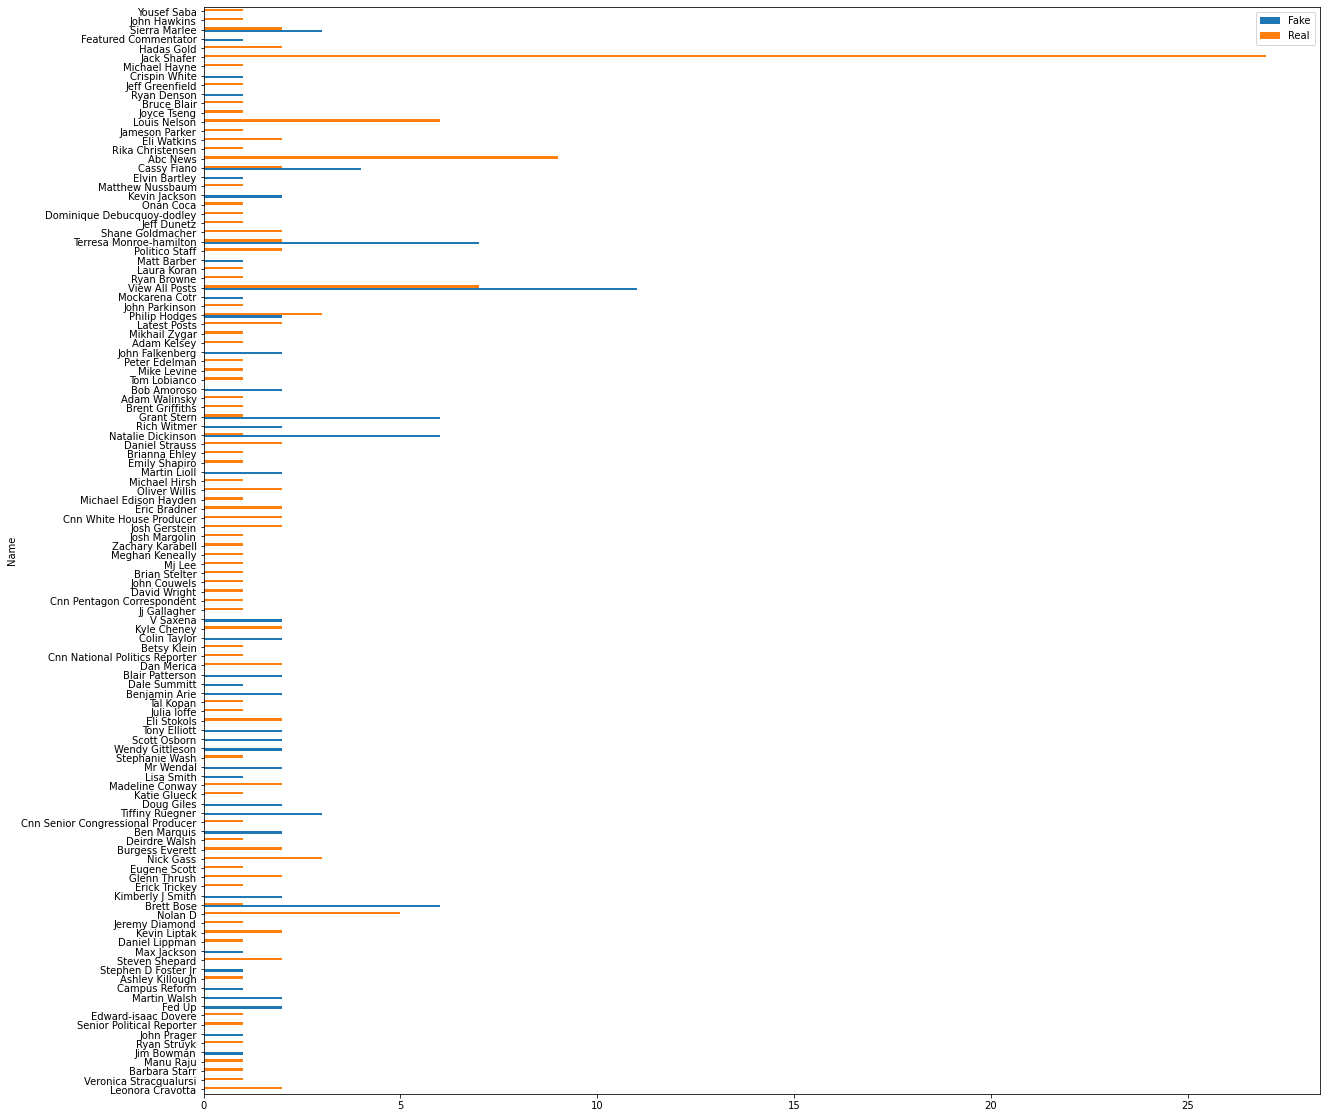

In [ ]:
author_df.plot.barh(x='Name', y=['Fake','Real'],fontsize=10, figsize=(20,20))

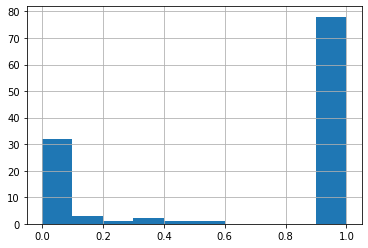

In [ ]:
author_df['Score'].hist()

In [ ]:
score = []
score_list = []
                                   
for i in range(0,len(df)):
  if df['new_authors'][i] == 0.5:           #기자가 결측치인 경우 score=0.5
    score_list.append(0.5)
  else:                                   
    for author in df['new_authors'][i]:       
      score.append(list(author_df[author_df['Name'].isin([author])]['Score']))       #기자가 존재하는 경우 기자 데이터프레임에서 score를 가져와 score list에 append
    
    sum_score = sum(score, [])                                                  #[[점수1],[점수2], ... ]의 형식을 [점수1,점수2,...]의 형식으로 변환.
    score_list.append(round(sum(sum_score)/len(score),2))                         #score의 평균값을 계산하고 소수점 셋째 자리에서 반올림하여 최종 데이터셋에 append 
    score = []

df['Author_Score'] = score_list

In [ ]:
df.head()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real,"[View All Posts, Leonora Cravotta]",0.69
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real,"[Adam Kelsey, Abc News]",1.00
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real,[Cassy Fiano],0.33
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real,"[Jack Shafer, Erick Trickey, Zachary Karabell]",1.00
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real,"[John Parkinson, Abc News]",1.00


In [ ]:
df.tail() #결측치의 경우 0.5으로 잘 들어가 있으며 나머지 경우는 밑에서 검증해보삼

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score
177,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,Terresa Monroe-hamilton,http://rightwingnews.com,0,http://1.gravatar.com/avatar/d35b77ff6c3900715...,0.787237,0.109145,0.27,Fake,[Terresa Monroe-hamilton],0.22
178,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,1,http://conservativetribune.com/wp-content/uplo...,0.684159,0.097021,0.11,Fake,"[Martin Lioll, John Falkenberg, Ben Marquis, K...",0.00
179,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,"Rich Witmer,Doug Giles",http://clashdaily.com,0,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,0.789346,0.126465,0.04,Fake,"[Rich Witmer, Doug Giles]",0.00
180,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0.5,http://www.thepoliticalinsider.com,0,http://1.gravatar.com/avatar/71be986d321b3d520...,0.708119,0.123283,0.03,Fake,0.5,0.50
181,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,Lisa Smith,http://rightwingnews.com,0,http://0.gravatar.com/avatar/3728144c20aefded7...,0.754393,0.122350,0.16,Fake,[Lisa Smith],0.00


In [ ]:
df['Author_Score'].describe()

count    182.000000
mean       0.575495
std        0.376938
min        0.000000
25%        0.220000
50%        0.500000
75%        1.000000
max        1.000000
Name: Author_Score, dtype: float64

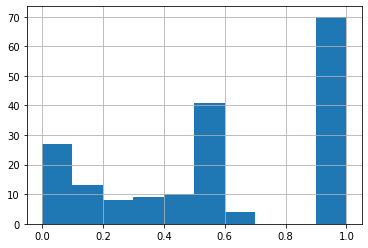

In [ ]:
df['Author_Score'].hist()

##### 검증

In [ ]:
author_df[author_df['Name'].isin(['Lisa Smith'])]

,Name,Fake,Real,Score
34,Lisa Smith,1,0,0


In [ ]:
author_df[author_df['Name'].isin(['Rich Witmer'])]

,Name,Fake,Real,Score
72,Rich Witmer,2,0,0


In [ ]:
author_df[author_df['Name'].isin(['Doug Giles'])]

,Name,Fake,Real,Score
31,Doug Giles,2,0,0


In [ ]:
shit = []
shit.append(list(author_df[author_df['Name'].isin(['Adam Kelsey'])]['Score']))
shit.append(list(author_df[author_df['Name'].isin(['Abc News'])]['Score']))
shit

[[1.0], [1.0]]

In [ ]:
sum_shit = sum(shit, [])
sum_shit

[1.0, 1.0]

In [ ]:
print(round(sum(sum_shit)/len(shit),2))

1.0


## Image

In [ ]:
image_list = list(df['images'])   
append_list = []
i_list = []

for i in range(0,len(df)):
  if type(image_list[i]) == str:           #결측치가 아닌 경우 ,를 기준으로 split한 뒤 http://이후의 /를 찾아 해당하는 곳의 뒷부분을 제거하고 중복을 방지함.
    temp = image_list[i].split(",")
    for link in temp: 
      idx = link.find("/",8)
      if link[:idx].startswith("http") and link[:idx] not in i_list:
        i_list.append(link[:idx])
    if i_list == []:                      
      append_list.append(0.5)
    else:
      append_list.append(i_list)
      i_list = []                          #빈 리스트가 아닌 경우 임시 리스트를 append할 list에 추가
  else:
    append_list.append(image_list[i])      #결측치인 경우 0을 그대로 append

df['new_images'] = append_list             #데이터프레임에 새로운 열을 만들어 추가. 결과물은 [링크1,링크2,링크3,...] or 0일 것임.

In [ ]:
df.head()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real,"[View All Posts, Leonora Cravotta]",0.69,"[http://constitution.com, http://2lv0hm3wvpix4..."
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real,"[Adam Kelsey, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc..."
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real,[Cassy Fiano],0.33,"[http://rightwingnews.com, http://pixel.quants..."
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real,"[Jack Shafer, Erick Trickey, Zachary Karabell]",1.00,"[https://static.politico.com, http://static.po..."
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real,"[John Parkinson, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc..."


In [ ]:
df['images'][3]

'https://static.politico.com/dims4/default/8a1ce5d/2147483647/resize/1160x%3E/quality/90/?url=http%3A%2F%2Fstatic.politico.com%2Fe9%2F11%2F6144cdc24e319c921fea909525b3%2Fmanufacturing.jpg,http://static.politico.com/e9/11/6144cdc24e319c921fea909525b3/manufacturing.jpg,data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='

In [ ]:
df['new_images'][3]

['https://static.politico.com', 'http://static.politico.com']

In [ ]:
total_img_pair = []                 
for i in range(0,len(df)):
  if df['new_images'][i] != 0.5:               #결측치가 아닌 경우 링크와 뉴스 타입 간 쌍을 생성. [랑크, 뉴스타입]의 형식.
    for image in df['new_images'][i]:
        pair = [image, df['news_type'][i]]
        total_img_pair.append(pair)              #해당 쌍을 모두 append.
total_img_pair              

[['http://constitution.com', 'Real'],
 ['http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com', 'Real'],
 ['http://pixel.quantserve.com', 'Real'],
 ['http://0.gravatar.com', 'Real'],
 ['http://b.scorecardresearch.com', 'Real'],
 ['http://eaglerising.com', 'Real'],
 ['http://www.googleadservices.com', 'Real'],
 ['http://a.abcnews.com', 'Real'],
 ['http://secure-us.imrworldwide.com', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://pixel.quantserve.com', 'Real'],
 ['https://www.facebook.com', 'Real'],
 ['http://www.rightwingnews.com', 'Real'],
 ['http://2.gravatar.com', 'Real'],
 ['https://static.politico.com', 'Real'],
 ['http://static.politico.com', 'Real'],
 ['http://www.googleadservices.com', 'Real'],
 ['http://a.abcnews.com', 'Real'],
 ['http://secure-us.imrworldwide.com', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://pixel.quantserve.com', 'Real'],
 ['https://www.facebook.com', 'Real'],
 ['http://www.rightwingnews.com', 'Real'],
 ['http://2.gravatar.com', 'R

In [ ]:
total_img_list = [pair[0] for pair in total_img_pair]    #링크를 unique함.
print("Unique 전 image 수: ",len(total_img_list))
final_img_list = list(set(total_img_list))
print("Unique 후 image 수: ",len(final_img_list))

image_df = pd.DataFrame(columns=['Link','Fake', 'Real','Score']) #이미지(링크)에 대한 데이터프레임을 생성하고 unique된 링크 리스트를 append.
image_df['Link'] = final_img_list
image_df

Unique 전 image 수:  651
Unique 후 image 수:  72


,Link,Fake,Real,Score
0,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdn...,NaN,NaN,NaN
1,http://www.chicksontheright.com,NaN,NaN,NaN
2,http://1csabj4ddrd61fgqez2e4nss.wpengine.netdn...,NaN,NaN,NaN
3,https://secure.gravatar.com,NaN,NaN,NaN
4,http://i2.cdn.turner.com,NaN,NaN,NaN
...,...,...,...,...
67,http://pixel.quantserve.com,NaN,NaN,NaN
68,http://eaglerising.com,NaN,NaN,NaN
69,http://lh3.googleusercontent.com,NaN,NaN,NaN
70,http://a.abcnews.com,NaN,NaN,NaN


In [ ]:
for i in range(0,len(image_df)):                                                     #해당 기자의 fake와 real을 count하여 append. score도 계산.
  image_df['Fake'][i] = total_img_pair.count([image_df['Link'][i],'Fake'])
  image_df['Real'][i] = total_img_pair.count([image_df['Link'][i],'Real'])
  image_df['Score'][i] = image_df['Real'][i]/ (image_df['Real'][i] + image_df["Fake"][i])

In [ ]:
image_df #최종 기자 데이터프레임.

,Link,Fake,Real,Score
0,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdn...,11,7,0.388889
1,http://www.chicksontheright.com,1,0,0
2,http://1csabj4ddrd61fgqez2e4nss.wpengine.netdn...,16,1,0.0588235
3,https://secure.gravatar.com,3,0,0
4,http://i2.cdn.turner.com,0,4,1
...,...,...,...,...
67,http://pixel.quantserve.com,66,25,0.274725
68,http://eaglerising.com,11,7,0.388889
69,http://lh3.googleusercontent.com,3,0,0
70,http://a.abcnews.com,0,9,1


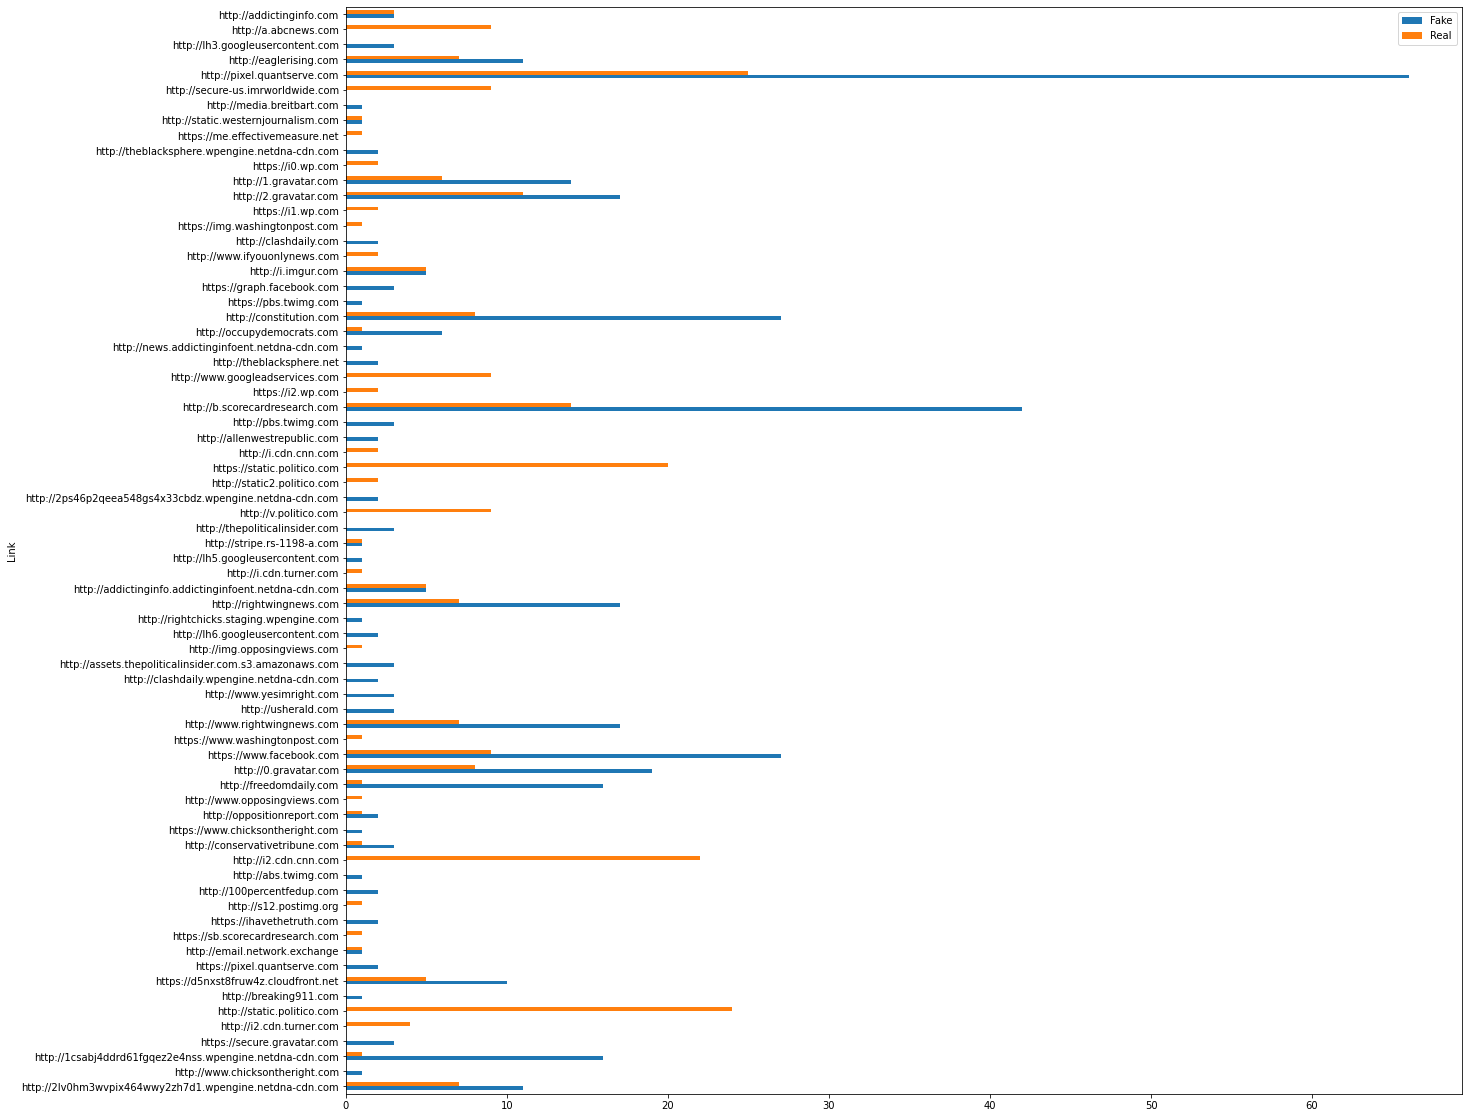

In [ ]:
image_df.plot.barh(x='Link', y=['Fake','Real'],fontsize=10, figsize=(20,20))

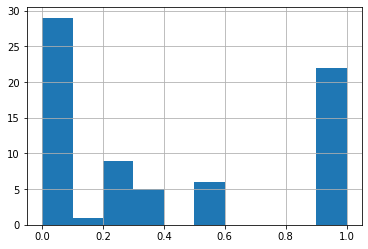

In [ ]:
image_df['Score'].hist()

In [ ]:
score = []
score_list = []
                                   
for i in range(0,len(df)):
  if df['new_images'][i] == 0.5:           #링크가 결측치인 경우 score=0.
    score_list.append(0.5)
  else:                                   
    for link in df['new_images'][i]:       
      score.append(list(image_df[image_df['Link'].isin([link])]['Score']))       #링크가 존재하는 경우 기자 데이터프레임에서 score를 가져와 score에 append
    
    sum_score = sum(score, [])                                                  #[[점수1],[점수2], ... ]의 형식을 [점수1,점수2,...]의 형식으로 변환.
    score_list.append(round(sum(sum_score)/len(score),2))                         #score의 평균값을 계산하고 소수점 셋째 자리에서 반올림하여 최종 데이터셋에 append 
    score = []

df['Image_Score'] = score_list

In [ ]:
df.head()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images,Image_Score
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real,"[View All Posts, Leonora Cravotta]",0.69,"[http://constitution.com, http://2lv0hm3wvpix4...",0.3
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real,"[Adam Kelsey, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc...",1.0
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real,[Cassy Fiano],0.33,"[http://rightwingnews.com, http://pixel.quants...",0.3
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real,"[Jack Shafer, Erick Trickey, Zachary Karabell]",1.00,"[https://static.politico.com, http://static.po...",1.0
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real,"[John Parkinson, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc...",1.0


In [ ]:
df.tail()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images,Image_Score
177,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,Terresa Monroe-hamilton,http://rightwingnews.com,0,http://1.gravatar.com/avatar/d35b77ff6c3900715...,0.787237,0.109145,0.27,Fake,[Terresa Monroe-hamilton],0.22,"[http://1.gravatar.com, http://pixel.quantserv...",0.28
178,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,1,http://conservativetribune.com/wp-content/uplo...,0.684159,0.097021,0.11,Fake,"[Martin Lioll, John Falkenberg, Ben Marquis, K...",0.00,"[http://conservativetribune.com, http://b.scor...",0.28
179,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,"Rich Witmer,Doug Giles",http://clashdaily.com,0,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,0.789346,0.126465,0.04,Fake,"[Rich Witmer, Doug Giles]",0.00,"[http://clashdaily.wpengine.netdna-cdn.com, ht...",0.13
180,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0.5,http://www.thepoliticalinsider.com,0,http://1.gravatar.com/avatar/71be986d321b3d520...,0.708119,0.123283,0.03,Fake,0.5,0.50,"[http://1.gravatar.com, https://graph.facebook...",0.13
181,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,Lisa Smith,http://rightwingnews.com,0,http://0.gravatar.com/avatar/3728144c20aefded7...,0.754393,0.122350,0.16,Fake,[Lisa Smith],0.00,"[http://0.gravatar.com, http://rightwingnews.c...",0.28


In [ ]:
df['Image_Score'].describe()

count    182.000000
mean       0.534670
std        0.359211
min        0.000000
25%        0.280000
50%        0.320000
75%        1.000000
max        1.000000
Name: Image_Score, dtype: float64

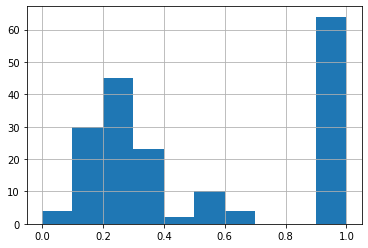

In [ ]:
df['Image_Score'].hist()

##### 검증

In [ ]:
df['new_images'][3]

['https://static.politico.com', 'http://static.politico.com']

In [ ]:
image_df[image_df['Link'].isin(['https://static.politico.com'])]

,Link,Fake,Real,Score
41,https://static.politico.com,0,20,1


In [ ]:
image_df[image_df['Link'].isin(['http://static.politico.com'])]

,Link,Fake,Real,Score
5,http://static.politico.com,0,24,1


In [ ]:
shit = []
shit.append(list(image_df[image_df['Link'].isin(['https://static.politico.com'])]['Score']))
shit.append(list(image_df[image_df['Link'].isin(['http://static.politico.com'])]['Score']))
shit

[[1.0], [1.0]]

In [ ]:
sum_shit = sum(shit, [])
sum_shit

[1.0, 1.0]

In [ ]:
print(round(sum(sum_shit)/len(shit),2))

1.0


## Source

In [ ]:
total_sc_pair = []                 
for i in range(0,len(df)):
  if df['source'][i] != 0.5:               #결측치가 아닌 경우 링크와 뉴스 타입 간 쌍을 생성. [랑크, 뉴스타입]의 형식.
      pair = [df['source'][i], df['news_type'][i]]
      total_sc_pair.append(pair)              #해당 쌍을 모두 append.
total_sc_pair              

[['http://eaglerising.com', 'Real'],
 ['http://abcn.ws', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://abcn.ws', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://abcn.ws', 'Real'],
 ['http://abcn.ws', 'Real'],
 ['http://cnn.it', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://cnn.it', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://abcn.ws', 'Real'],
 ['http://occupydemocrats.com', 'Real'],
 ['http://cnn.it', 'Real'],
 ['http://eaglerising.com', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://eaglerising.com', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://cnn.it', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://politi.co', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://cnn.it', 'Real'],
 ['http://www.opposingviews.com', 'Real'],
 ['http://rightwingnews.com', 'Real'],
 ['http://polit

In [ ]:
len(total_sc_pair)

174

In [ ]:
total_sc_list = [pair[0] for pair in total_sc_pair]    #링크를 unique함.
print("Unique 전 image 수: ",len(total_sc_list))
final_sc_list = list(set(total_sc_list))
print("Unique 후 image 수: ",len(final_sc_list))

source_df = pd.DataFrame(columns=['Link','Fake', 'Real','Score']) #이미지(링크)에 대한 데이터프레임을 생성하고 unique된 링크 리스트를 append.
source_df['Link'] = final_sc_list
source_df

Unique 전 image 수:  174
Unique 후 image 수:  28


,Link,Fake,Real,Score
0,http://www.chicksontheright.com,NaN,NaN,NaN
1,http://politi.co,NaN,NaN,NaN
2,https://ihavethetruth.com,NaN,NaN,NaN
3,http://100percentfedup.com,NaN,NaN,NaN
4,http://conservativetribune.com,NaN,NaN,NaN
5,http://winningdemocrats.com,NaN,NaN,NaN
6,http://www.opposingviews.com,NaN,NaN,NaN
7,http://freedomdaily.com,NaN,NaN,NaN
8,http://author.groopspeak.com,NaN,NaN,NaN
9,http://usherald.com,NaN,NaN,NaN


In [ ]:
for i in range(0,len(source_df)):                                                     #해당 기자의 fake와 real을 count하여 append. score도 계산.
  source_df['Fake'][i] = total_sc_pair.count([source_df['Link'][i],'Fake'])
  source_df['Real'][i] = total_sc_pair.count([source_df['Link'][i],'Real'])
  source_df['Score'][i] = source_df['Real'][i]/ (source_df['Real'][i] + source_df["Fake"][i])

In [ ]:
source_df #최종 기자 데이터프레임.

,Link,Fake,Real,Score
0,http://www.chicksontheright.com,1,0,0
1,http://politi.co,0,32,1
2,https://ihavethetruth.com,2,0,0
3,http://100percentfedup.com,2,0,0
4,http://conservativetribune.com,2,0,0
5,http://winningdemocrats.com,2,1,0.333333
6,http://www.opposingviews.com,0,1,1
7,http://freedomdaily.com,16,1,0.0588235
8,http://author.groopspeak.com,1,0,0
9,http://usherald.com,2,0,0


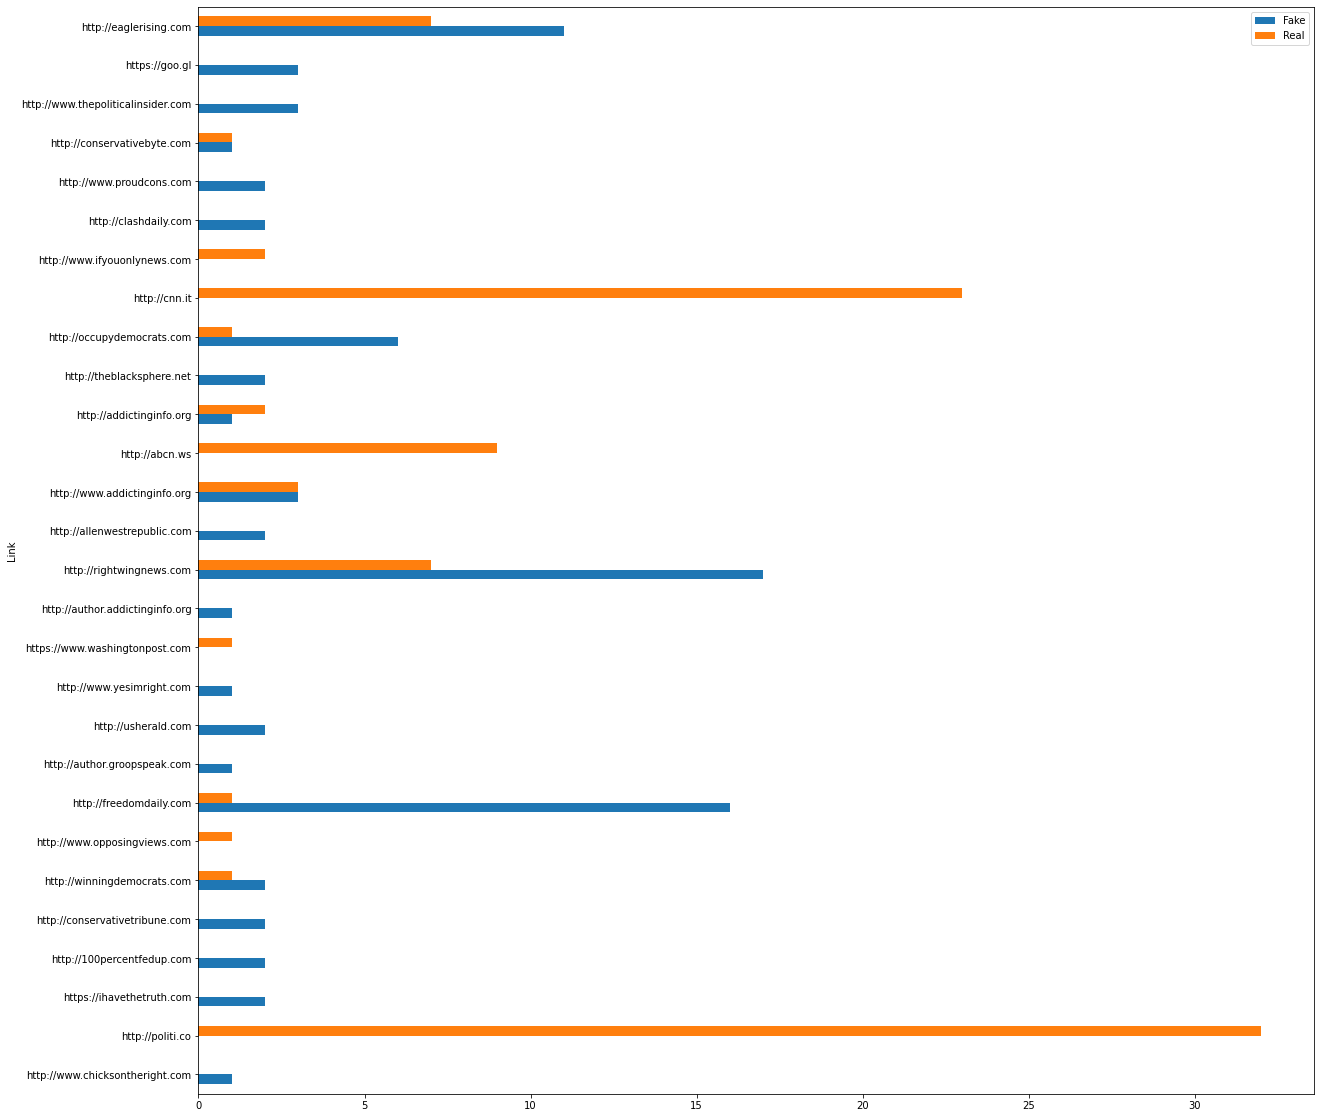

In [ ]:
source_df.plot.barh(x='Link', y=['Fake','Real'],fontsize=10, figsize=(20,20))

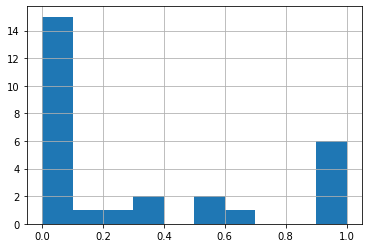

In [ ]:
source_df['Score'].hist()

In [ ]:
source_score = []
                                   
for link in df['source']:
  if link == 0.5:           #링크가 결측치인 경우 score=0.
    source_score.append(0.5)
  else:
    value = list(source_df[source_df['Link'].isin([link])]['Score'])                                        
    source_score.append(round(value[0],2))       #링크가 존재하는 경우 기자 데이터프레임에서 score를 가져와 score에 append 

df['Source_Score'] = source_score

In [ ]:
df.head()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images,Image_Score,Source_Score
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real,"[View All Posts, Leonora Cravotta]",0.69,"[http://constitution.com, http://2lv0hm3wvpix4...",0.3,0.39
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real,"[Adam Kelsey, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc...",1.0,1.00
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real,[Cassy Fiano],0.33,"[http://rightwingnews.com, http://pixel.quants...",0.3,0.29
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real,"[Jack Shafer, Erick Trickey, Zachary Karabell]",1.00,"[https://static.politico.com, http://static.po...",1.0,1.00
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real,"[John Parkinson, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc...",1.0,1.00


In [ ]:
df.tail()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images,Image_Score,Source_Score
177,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,Terresa Monroe-hamilton,http://rightwingnews.com,0,http://1.gravatar.com/avatar/d35b77ff6c3900715...,0.787237,0.109145,0.27,Fake,[Terresa Monroe-hamilton],0.22,"[http://1.gravatar.com, http://pixel.quantserv...",0.28,0.29
178,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,1,http://conservativetribune.com/wp-content/uplo...,0.684159,0.097021,0.11,Fake,"[Martin Lioll, John Falkenberg, Ben Marquis, K...",0.00,"[http://conservativetribune.com, http://b.scor...",0.28,0.00
179,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,"Rich Witmer,Doug Giles",http://clashdaily.com,0,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,0.789346,0.126465,0.04,Fake,"[Rich Witmer, Doug Giles]",0.00,"[http://clashdaily.wpengine.netdna-cdn.com, ht...",0.13,0.00
180,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0.5,http://www.thepoliticalinsider.com,0,http://1.gravatar.com/avatar/71be986d321b3d520...,0.708119,0.123283,0.03,Fake,0.5,0.50,"[http://1.gravatar.com, https://graph.facebook...",0.13,0.00
181,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,Lisa Smith,http://rightwingnews.com,0,http://0.gravatar.com/avatar/3728144c20aefded7...,0.754393,0.122350,0.16,Fake,[Lisa Smith],0.00,"[http://0.gravatar.com, http://rightwingnews.c...",0.28,0.29


In [ ]:
df['Source_Score'].describe()

count    182.000000
mean       0.521868
std        0.400697
min        0.000000
25%        0.140000
50%        0.390000
75%        1.000000
max        1.000000
Name: Source_Score, dtype: float64

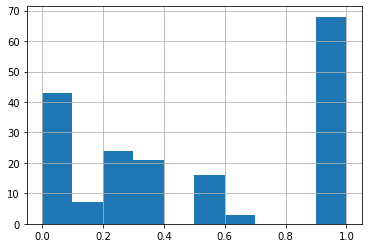

In [ ]:
df['Source_Score'].hist()

##### 검증

In [ ]:
df['new_images'][3]

['https://static.politico.com', 'http://static.politico.com']

In [ ]:
image_df[image_df['Link'].isin(['https://static.politico.com'])]

,Link,Fake,Real,Score
41,https://static.politico.com,0,20,1


In [ ]:
image_df[image_df['Link'].isin(['http://static.politico.com'])]

,Link,Fake,Real,Score
5,http://static.politico.com,0,24,1


In [ ]:
shit = []
shit.append(list(image_df[image_df['Link'].isin(['https://static.politico.com'])]['Score']))
shit.append(list(image_df[image_df['Link'].isin(['http://static.politico.com'])]['Score']))
shit

[[1.0], [1.0]]

In [ ]:
sum_shit = sum(shit, [])
sum_shit

[1.0, 1.0]

In [ ]:
print(round(sum(sum_shit)/len(shit),2))

1.0


## User Credibility

In [ ]:
nu_path = '/content/drive/MyDrive/fakenews/BuzzFeedNewsUser.txt'
news_user = pd.read_csv(nu_path, header= None, sep='\t')
news_user.columns = ['news','user','retweet']
news_user.head()

,news,user,retweet
0,45,1,1
1,127,2,1
2,115,3,1
3,180,3,1
4,140,4,1


In [ ]:
num_to_type = []

for news in news_user['news']:
  if news <= 91:
    num_to_type.append('Real')
  else:
    num_to_type.append('Fake')

news_user['news'] = num_to_type

In [ ]:
news_user

,news,user,retweet
0,Real,1,1
1,Fake,2,1
2,Fake,3,1
3,Fake,3,1
4,Fake,4,1
...,...,...,...
22774,Fake,15257,1
22775,Fake,15257,1
22776,Fake,15257,1
22777,Fake,15257,1


In [ ]:
total_uc_pair = []                 
for i in range(0,len(news_user)):
  if news_user['retweet'][i] == 1:
    pair = [news_user['user'][i], news_user['news'][i]]
    total_uc_pair.append(pair)             
  else:
    weight = news_user['retweet'][i]
    pair = [news_user['user'][i], news_user['news'][i]]
    for j in range(weight):
      total_uc_pair.append(pair)

total_uc_pair              

[[1, 'Real'],
 [2, 'Fake'],
 [3, 'Fake'],
 [3, 'Fake'],
 [4, 'Fake'],
 [5, 'Real'],
 [6, 'Real'],
 [7, 'Real'],
 [8, 'Real'],
 [9, 'Fake'],
 [10, 'Fake'],
 [10, 'Fake'],
 [10, 'Fake'],
 [11, 'Fake'],
 [12, 'Fake'],
 [13, 'Fake'],
 [14, 'Fake'],
 [15, 'Fake'],
 [16, 'Fake'],
 [17, 'Real'],
 [18, 'Real'],
 [19, 'Fake'],
 [19, 'Fake'],
 [19, 'Fake'],
 [19, 'Fake'],
 [19, 'Fake'],
 [19, 'Fake'],
 [20, 'Real'],
 [21, 'Fake'],
 [22, 'Real'],
 [23, 'Real'],
 [24, 'Fake'],
 [25, 'Real'],
 [26, 'Fake'],
 [27, 'Real'],
 [28, 'Fake'],
 [29, 'Fake'],
 [30, 'Real'],
 [30, 'Real'],
 [30, 'Real'],
 [30, 'Real'],
 [31, 'Real'],
 [32, 'Fake'],
 [33, 'Real'],
 [33, 'Fake'],
 [34, 'Real'],
 [35, 'Fake'],
 [36, 'Fake'],
 [36, 'Fake'],
 [37, 'Fake'],
 [38, 'Fake'],
 [39, 'Real'],
 [40, 'Real'],
 [41, 'Real'],
 [42, 'Fake'],
 [43, 'Real'],
 [44, 'Fake'],
 [45, 'Fake'],
 [46, 'Real'],
 [47, 'Real'],
 [47, 'Real'],
 [47, 'Real'],
 [48, 'Fake'],
 [48, 'Fake'],
 [49, 'Real'],
 [50, 'Real'],
 [51, 'Real'],
 [51,

In [ ]:
len(total_uc_pair)

25240

In [ ]:
total_uc_list = [pair[0] for pair in total_uc_pair]    #링크를 unique함.
print("Unique 전 user pair 수: ",len(total_uc_list))
final_uc_list = list(set(total_uc_list))
print("Unique 후 user pair 수: ",len(final_uc_list))

uc_df = pd.DataFrame(columns=['User','Fake', 'Real','Score']) #이미지(링크)에 대한 데이터프레임을 생성하고 unique된 링크 리스트를 append.
uc_df['User'] = final_uc_list
uc_df

Unique 전 user pair 수:  25240
Unique 후 user pair 수:  15257


,User,Fake,Real,Score
0,1,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
15252,15253,NaN,NaN,NaN
15253,15254,NaN,NaN,NaN
15254,15255,NaN,NaN,NaN
15255,15256,NaN,NaN,NaN


In [ ]:
for i in range(0,len(uc_df)):                                                     
  uc_df['Fake'][i] = total_uc_pair.count([uc_df['User'][i],'Fake'])
  uc_df['Real'][i] = total_uc_pair.count([uc_df['User'][i],'Real'])
  uc_df['Score'][i] = uc_df['Real'][i]/ (uc_df['Real'][i] + uc_df["Fake"][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
uc_df #최종 기자 데이터프레임.

,User,Fake,Real,Score
0,1,0,1,1
1,2,1,0,0
2,3,2,0,0
3,4,1,0,0
4,5,0,1,1
...,...,...,...,...
15252,15253,0,1,1
15253,15254,1,0,0
15254,15255,1,0,0
15255,15256,1,0,0


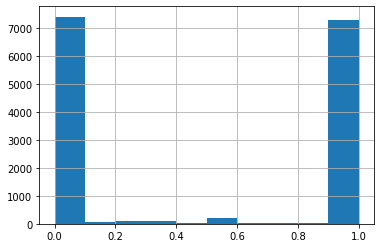

In [ ]:
uc_df['Score'].hist()

In [ ]:
nu = pd.read_csv(nu_path, header = None)
nu_edges = [list(map(int, nu[0][i].split('\t'))) for i in range(0,len(nu))]
nu_edges.sort(key= lambda x: x[0])

news = pd.DataFrame(columns=['Edges'])

news_list = []

for i in range(1,183):
  for j in range(0,len(nu_edges)):
    if nu_edges[j][0] == i:
      news_list.append(nu_edges[j])
  news.loc[i] = [news_list]
  news_list = []

user_list_df = pd.DataFrame()

user_list = []

for i in range(0,182):
  u = news['Edges'].iloc[i]
  u_list = [edge[1] for edge in news['Edges'].iloc[i]]

  user_list.append(u_list)

user_list_df['User_list'] = user_list
user_list_df.index = list(range(1,183))

user_list_df

,User_list
1,"[409, 3185, 3519, 5320, 7040, 7194, 8597, 1004..."
2,"[190, 192, 429, 532, 735, 853, 1413, 1546, 155..."
3,"[86, 292, 532, 548, 684, 1110, 1546, 1559, 158..."
4,"[1904, 8253, 8939, 10460, 14213, 14417]"
5,"[5, 162, 192, 292, 348, 523, 532, 548, 587, 59..."
...,...
178,"[4469, 4828, 7152, 8243, 9147, 10607, 12453, 1..."
179,"[2033, 2806, 3257, 4168, 4331, 4828, 5619, 635..."
180,"[3, 10, 15, 19, 26, 57, 68, 88, 96, 103, 107, ..."
181,"[57, 107, 117, 209, 218, 262, 280, 336, 548, 5..."


In [ ]:
uc_df.index = list(range(1,15258))
uc_df

,User,Fake,Real,Score
1,1,0,1,1
2,2,1,0,0
3,3,2,0,0
4,4,1,0,0
5,5,0,1,1
...,...,...,...,...
15253,15253,0,1,1
15254,15254,1,0,0
15255,15255,1,0,0
15256,15256,1,0,0


In [ ]:
uc_score = []
                                   
for userlist in user_list_df['User_list']:
    score = []
    for user in userlist:
      a = list(uc_df[uc_df['User'].isin([user])]['Score'])
      score.append(a[0])

    us = sum(score)/len(userlist)    
    uc_score.append(round(us,2))

df['Uc_Score'] = uc_score

In [ ]:
df.head()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images,Image_Score,Source_Score,Uc_Score
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","View All Posts,Leonora Cravotta",http://eaglerising.com,0,http://constitution.com/wp-content/uploads/201...,0.766990,0.178493,0.35,Real,"[View All Posts, Leonora Cravotta]",0.69,"[http://constitution.com, http://2lv0hm3wvpix4...",0.3,0.39,0.31
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.797183,0.082105,1.13,Real,"[Adam Kelsey, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc...",1.0,1.00,0.99
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",Cassy Fiano,http://rightwingnews.com,1,http://rightwingnews.com/wp-content/uploads/20...,0.649110,0.109048,0.97,Real,[Cassy Fiano],0.33,"[http://rightwingnews.com, http://pixel.quants...",0.3,0.29,0.99
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,0,https://static.politico.com/dims4/default/8a1c...,1.225374,0.245842,0.31,Real,"[Jack Shafer, Erick Trickey, Zachary Karabell]",1.00,"[https://static.politico.com, http://static.po...",1.0,1.00,0.24
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,0,http://www.googleadservices.com/pagead/convers...,0.676302,0.112470,0.98,Real,"[John Parkinson, Abc News]",1.00,"[http://www.googleadservices.com, http://a.abc...",1.0,1.00,0.98


In [ ]:
df.tail()

,title,text,authors,source,contain_movies,images,in_out_degree,clustering_coef,user_credibility,news_type,new_authors,Author_Score,new_images,Image_Score,Source_Score,Uc_Score
177,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,Terresa Monroe-hamilton,http://rightwingnews.com,0,http://1.gravatar.com/avatar/d35b77ff6c3900715...,0.787237,0.109145,0.27,Fake,[Terresa Monroe-hamilton],0.22,"[http://1.gravatar.com, http://pixel.quantserv...",0.28,0.29,0.22
178,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,"Martin Lioll,John Falkenberg,Ben Marquis,Kimbe...",http://conservativetribune.com,1,http://conservativetribune.com/wp-content/uplo...,0.684159,0.097021,0.11,Fake,"[Martin Lioll, John Falkenberg, Ben Marquis, K...",0.00,"[http://conservativetribune.com, http://b.scor...",0.28,0.00,0.10
179,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,"Rich Witmer,Doug Giles",http://clashdaily.com,0,http://clashdaily.wpengine.netdna-cdn.com/wp-c...,0.789346,0.126465,0.04,Fake,"[Rich Witmer, Doug Giles]",0.00,"[http://clashdaily.wpengine.netdna-cdn.com, ht...",0.13,0.00,0.03
180,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0.5,http://www.thepoliticalinsider.com,0,http://1.gravatar.com/avatar/71be986d321b3d520...,0.708119,0.123283,0.03,Fake,0.5,0.50,"[http://1.gravatar.com, https://graph.facebook...",0.13,0.00,0.02
181,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,Lisa Smith,http://rightwingnews.com,0,http://0.gravatar.com/avatar/3728144c20aefded7...,0.754393,0.122350,0.16,Fake,[Lisa Smith],0.00,"[http://0.gravatar.com, http://rightwingnews.c...",0.28,0.29,0.16


In [ ]:
df['Uc_Score'].describe()

count    182.000000
mean       0.466429
std        0.416052
min        0.000000
25%        0.070000
50%        0.270000
75%        0.967500
max        1.000000
Name: Uc_Score, dtype: float64

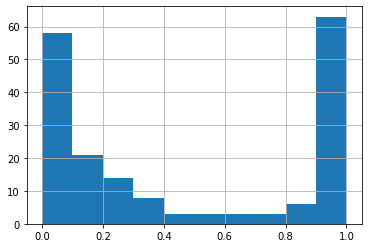

In [ ]:
df['Uc_Score'].hist()

##### 검증

In [ ]:
test = user_list_df['User_list'][4]
test

[1904, 8253, 8939, 10460, 14213, 14417]

In [ ]:
uc_df[uc_df['User'].isin([test[0]])]

,User,Fake,Real,Score
1904,1904,5,2,0.285714


In [ ]:
shit = []

for i in test:
  temp = list(uc_df[uc_df['User'].isin([i])]['Score'])
  shit.append(temp[0])

shit

[0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.25,
 0.2,
 0.1111111111111111]

In [ ]:
sum_shit = sum(shit)
sum_shit

1.4182539682539683

In [ ]:
eng = round(sum_shit/len(shit),2)
print(eng)

0.24


In [ ]:
df['Uc_Score'][3]

0.24

#**데이터 분석**

In [ ]:
#최종 데이터셋

df = df[['title','text','Author_Score','Image_Score','Source_Score','contain_movies','in_out_degree','clustering_coef','user_credibility','news_type']]
df.head()

,title,text,Author_Score,Image_Score,Source_Score,contain_movies,in_out_degree,clustering_coef,user_credibility,news_type
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",0.69,0.3,0.39,0,0.766990,0.178493,0.35,Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,1.00,1.0,1.00,0,0.797183,0.082105,1.13,Real
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",0.33,0.3,0.29,1,0.649110,0.109048,0.97,Real
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,1.00,1.0,1.00,0,1.225374,0.245842,0.31,Real
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,1.00,1.0,1.00,0,0.676302,0.112470,0.98,Real


In [ ]:
df['title_len'] = [len(i) for i in list(df['title'])]
df['text_len'] = [len(i) for i in list(df['text'])]
df = df[['title','text', 'title_len', 'text_len' ,'Author_Score','Image_Score','Source_Score','contain_movies','in_out_degree','clustering_coef','user_credibility','news_type']]
df.head()

,title,text,title_len,text_len,Author_Score,Image_Score,Source_Score,contain_movies,in_out_degree,clustering_coef,user_credibility,news_type
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",89,4793,0.69,0.3,0.39,0,0.766990,0.178493,0.35,Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,67,4028,1.00,1.0,1.00,0,0.797183,0.082105,1.13,Real
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",71,3003,0.33,0.3,0.29,1,0.649110,0.109048,0.97,Real
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,65,8263,1.00,1.0,1.00,0,1.225374,0.245842,0.31,Real
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,75,3069,1.00,1.0,1.00,0,0.676302,0.112470,0.98,Real


## t검정

In [ ]:
numerical_df = df[['title_len', 'text_len' ,'Author_Score','Image_Score','Source_Score','contain_movies','in_out_degree','clustering_coef','user_credibility','news_type']]

In [ ]:
numerical_df.head()

,title_len,text_len,Author_Score,Image_Score,Source_Score,contain_movies,in_out_degree,clustering_coef,user_credibility,news_type
0,89,4793,0.69,0.3,0.39,0,0.766990,0.178493,0.35,Real
1,67,4028,1.00,1.0,1.00,0,0.797183,0.082105,1.13,Real
2,71,3003,0.33,0.3,0.29,1,0.649110,0.109048,0.97,Real
3,65,8263,1.00,1.0,1.00,0,1.225374,0.245842,0.31,Real
4,75,3069,1.00,1.0,1.00,0,0.676302,0.112470,0.98,Real


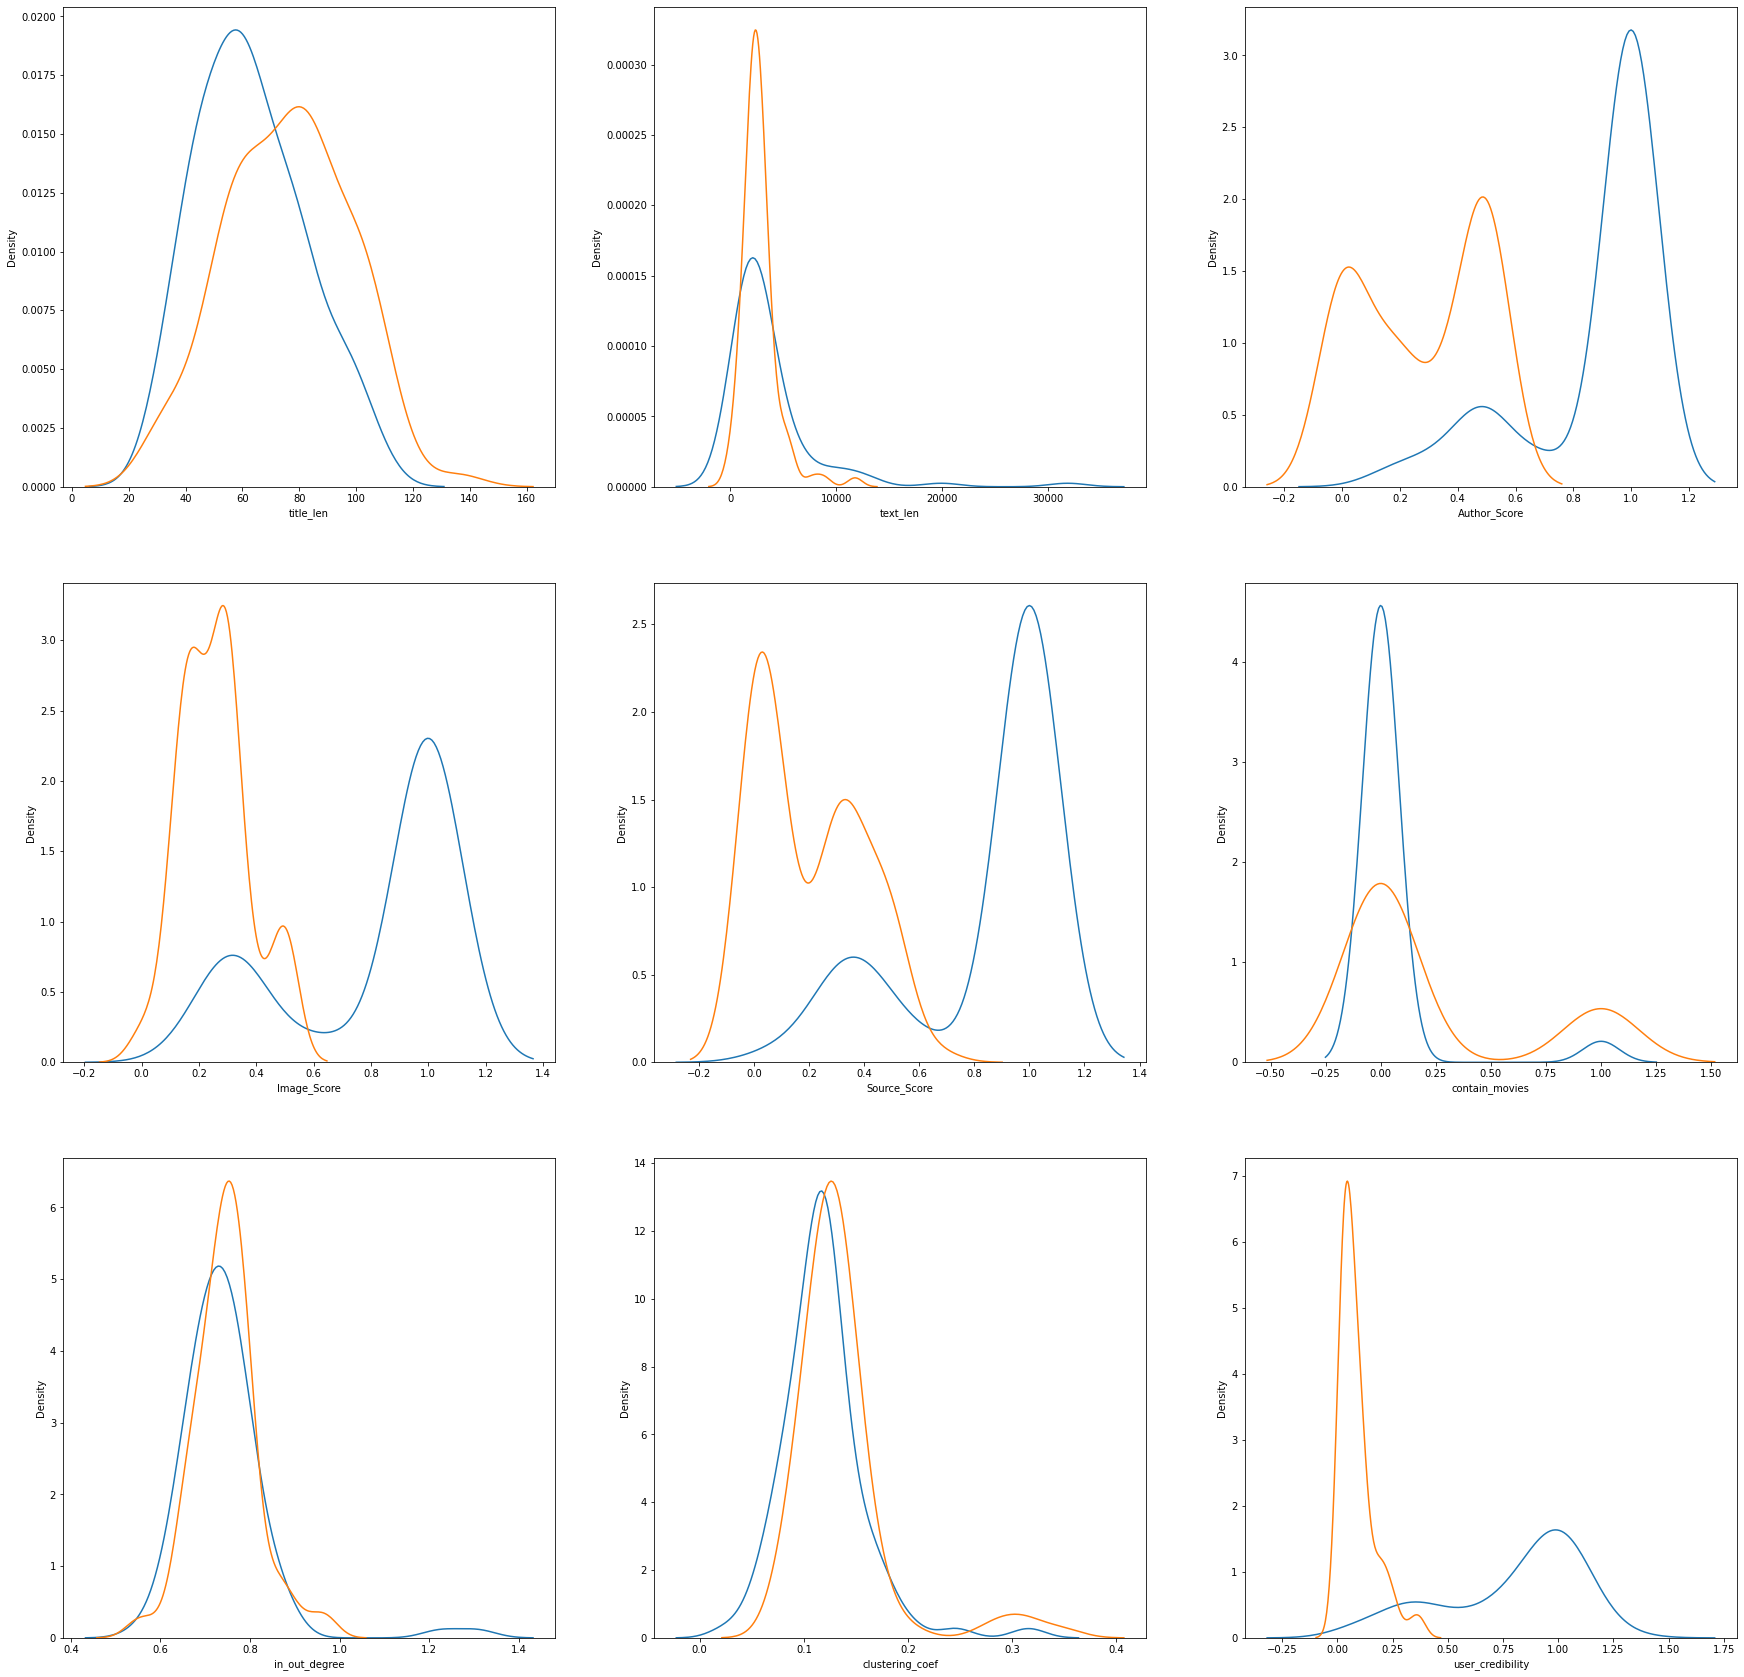

In [ ]:
plt.figure(figsize=(30,30))
for i,col in zip(range(1,10),list(numerical_df)[:10]):
    plt.subplot(3,3,i)
    sns.kdeplot(numerical_df.loc[numerical_df['news_type'] == 'Real', col], label = 'target == Real')
    sns.kdeplot(numerical_df.loc[numerical_df['news_type'] == 'Fake', col], label = 'target == Fake')
    # Labeling of plot
    plt.xlabel(col)
    plt.ylabel('Density')
plt.show()

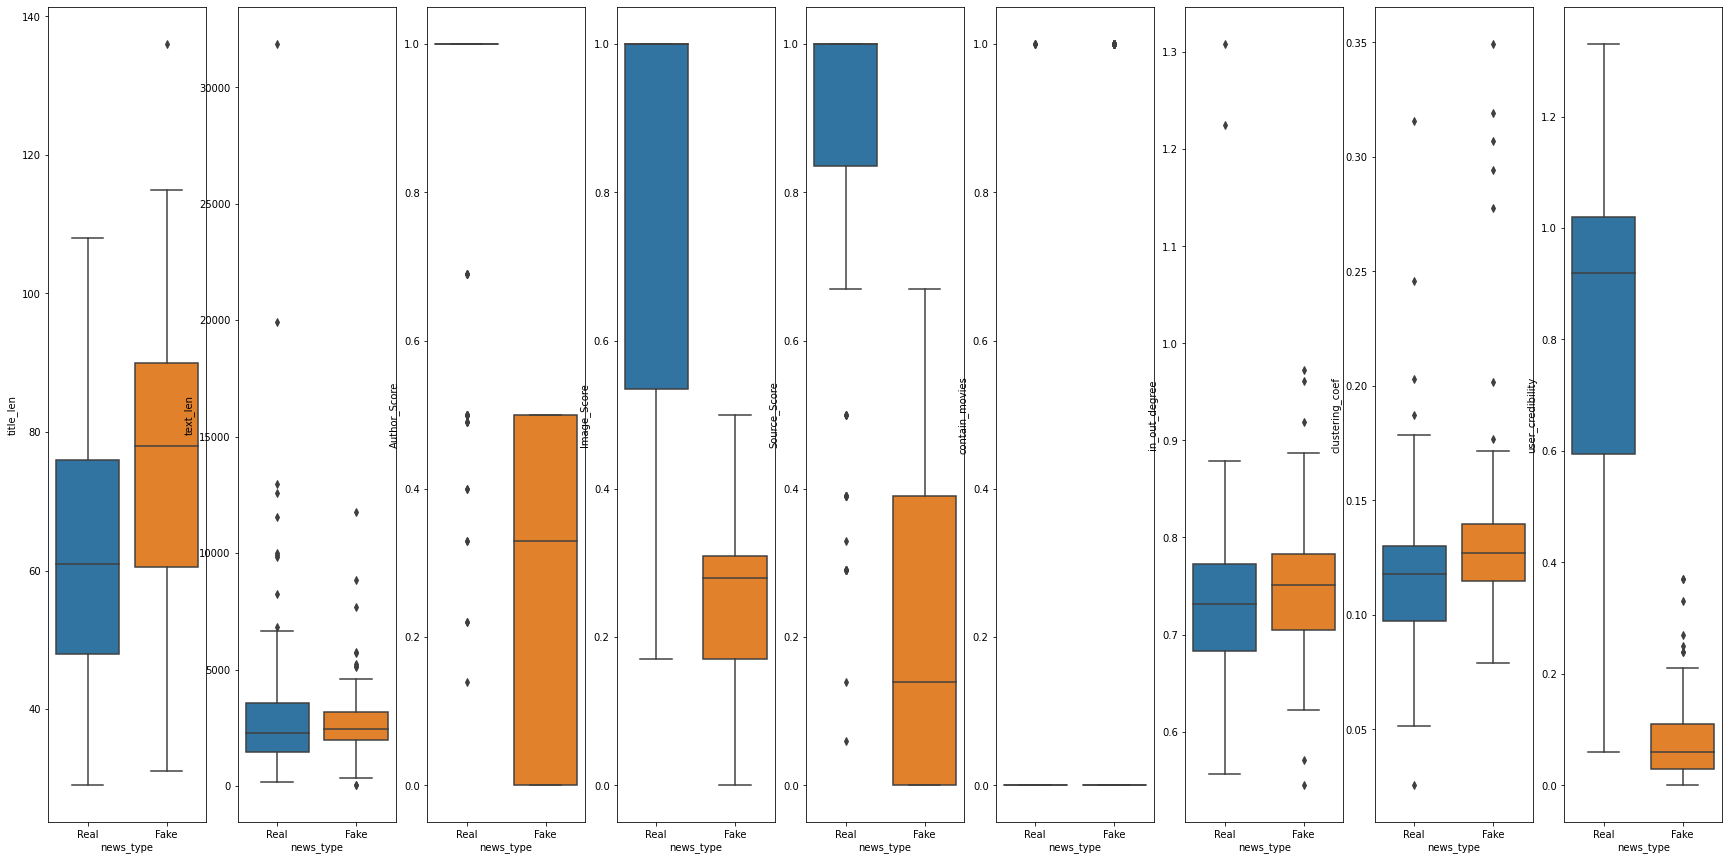

In [ ]:
plt.figure(figsize=(30,15))
for i,col in zip(range(1,10),list(numerical_df)[:10]):
    plt.subplot(1,9,i)
    sns.boxplot(x='news_type',y=col,data=numerical_df)
plt.show()

In [ ]:
from scipy import stats
real = numerical_df.loc[numerical_df['news_type']=='Real','title_len']
fake = numerical_df.loc[numerical_df['news_type']=='Fake','title_len']
iresult = stats.levene(real, fake)
list(iresult)[1]

0.1811029022682014

In [ ]:
result = stats.ttest_ind(real,fake, equal_var=True)
result

Ttest_indResult(statistic=-4.320618380472417, pvalue=2.5686701167792912e-05)

In [ ]:
from scipy import stats
for i in list(numerical_df)[:9]:
  real = numerical_df.loc[numerical_df['news_type']=='Real',i]
  fake = numerical_df.loc[numerical_df['news_type']=='Fake',i]
  iresult = stats.levene(real, fake)
  print(i)
  print(iresult)
  if list(iresult)[1] < 0.05:
    result = stats.ttest_ind(real, fake, equal_var=False)
  else:
    result = stats.ttest_ind(real, fake, equal_var=True)
  print(result,"\n") 

title_len
LeveneResult(statistic=1.8024862417040823, pvalue=0.1811029022682014)
Ttest_indResult(statistic=-4.320618380472417, pvalue=2.5686701167792912e-05) 

text_len
LeveneResult(statistic=6.273327578902223, pvalue=0.013145460011552746)
Ttest_indResult(statistic=1.749876433147398, pvalue=0.08276469390167737) 

Author_Score
LeveneResult(statistic=7.745408814274933, pvalue=0.005959738998477851)
Ttest_indResult(statistic=17.9512100135313, pvalue=8.603164339793108e-42) 

Image_Score
LeveneResult(statistic=8.276210821761154, pvalue=0.00450234411410593)
Ttest_indResult(statistic=16.293570973377815, pvalue=5.287862185759467e-32) 

Source_Score
LeveneResult(statistic=0.1420440783710512, pvalue=0.7067012517482643)
Ttest_indResult(statistic=17.97353837442388, pvalue=4.991404971604064e-42) 

contain_movies
LeveneResult(statistic=14.30693069306931, pvalue=0.00021118572993054612)
Ttest_indResult(statistic=-3.7824503556648716, pvalue=0.00023561093961389432) 

in_out_degree
LeveneResult(statistic=0

In [ ]:
real_movie = pd.DataFrame(numerical_df.loc[numerical_df['news_type']=='Real','contain_movies'].value_counts())
fake_movie = pd.DataFrame(numerical_df.loc[numerical_df['news_type']=='Fake','contain_movies'].value_counts())
chi_df = pd.concat([real_movie,fake_movie],axis=1)
chi_df

,contain_movies,contain_movies
0,87,70
1,4,21


In [ ]:
chiresult = stats.chi2_contingency(chi_df, correction=False)
chiresult

(13.40076433121019, 0.00025152178564443383, 1, array([[78.5, 78.5],
        [12.5, 12.5]]))

In [ ]:
chiresult_ = stats.chisquare(real_movie,fake_movie)
chiresult_

Power_divergenceResult(statistic=array([17.89047619]), pvalue=array([2.33989131e-05]))

##머신러닝

In [ ]:
numerical_df['news_type'] = pd.get_dummies(numerical_df['news_type'])['Real']
numerical_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title_len,text_len,Author_Score,Image_Score,Source_Score,contain_movies,in_out_degree,clustering_coef,user_credibility,news_type
0,89,4793,0.69,0.30,0.39,0,0.766990,0.178493,0.35,1
1,67,4028,1.00,1.00,1.00,0,0.797183,0.082105,1.13,1
2,71,3003,0.33,0.30,0.29,1,0.649110,0.109048,0.97,1
3,65,8263,1.00,1.00,1.00,0,1.225374,0.245842,0.31,1
4,75,3069,1.00,1.00,1.00,0,0.676302,0.112470,0.98,1
...,...,...,...,...,...,...,...,...,...,...
177,63,3150,0.22,0.28,0.29,0,0.787237,0.109145,0.27,0
178,52,2236,0.00,0.28,0.00,1,0.684159,0.097021,0.11,0
179,72,2247,0.00,0.13,0.00,0,0.789346,0.126465,0.04,0
180,51,845,0.50,0.13,0.00,0,0.708119,0.123283,0.03,0


In [ ]:
X = numerical_df.drop(['in_out_degree','clustering_coef','news_type'],axis=1)
y = numerical_df['news_type']

In [ ]:
X.head()

,title_len,text_len,Author_Score,Image_Score,Source_Score,contain_movies,user_credibility
0,89,4793,0.69,0.3,0.39,0,0.35
1,67,4028,1.00,1.0,1.00,0,1.13
2,71,3003,0.33,0.3,0.29,1,0.97
3,65,8263,1.00,1.0,1.00,0,0.31
4,75,3069,1.00,1.0,1.00,0,0.98


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale)
X_scale.columns = X.columns
X_scale.head()

,title_len,text_len,Author_Score,Image_Score,Source_Score,contain_movies,user_credibility
0,0.560748,0.149612,0.69,0.3,0.39,0.0,0.263158
1,0.355140,0.125577,1.00,1.0,1.00,0.0,0.849624
2,0.392523,0.093374,0.33,0.3,0.29,1.0,0.729323
3,0.336449,0.258632,1.00,1.0,1.00,0.0,0.233083
4,0.429907,0.095448,1.00,1.0,1.00,0.0,0.736842


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.2,random_state=42)

In [ ]:
y_test

19     1
42     1
154    0
98     0
146    0
15     1
24     1
68     1
115    0
96     0
95     0
160    0
69     1
111    0
45     1
16     1
51     1
127    0
97     0
56     1
174    0
122    0
144    0
30     1
9      1
123    0
60     1
18     1
165    0
143    0
172    0
55     1
90     1
82     1
66     1
29     1
119    0
Name: news_type, dtype: uint8

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score

In [ ]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
print("Model: Logistic Regression\n")
print("Coufusion Matrix:")
print(confusion_matrix(lr_predict,y_test))
print("\nClassification Report")
print(classification_report(lr_predict,y_test))
print("Auc Score:",roc_auc_score(lr_predict,y_test))

Model: Logistic Regression

Coufusion Matrix:
[[18  1]
 [ 0 18]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.97        18

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

Auc Score: 0.9736842105263158


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
print("Model: Random Forest\n")
print("Coufusion Matrix:")
print(confusion_matrix(rf_predict,y_test))
print("\nClassification Report")
print(classification_report(rf_predict,y_test))
print("Auc Score:",roc_auc_score(rf_predict,y_test))

Model: Random Forest

Coufusion Matrix:
[[18  0]
 [ 0 19]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Auc Score: 1.0


In [ ]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X,y)
feature_names = list(X_scale)
rf_feature_importance = []
for name, score in zip(feature_names, rnd_clf.feature_importances_):
    rf_feature_importance.append([name,score])
d = sorted(rf_feature_importance, key=lambda x : -x[1])
d_=pd.DataFrame(d)
d_['cumulative_importance']=np.cumsum(d_[1])
d_.columns = ['signal','rf_importance','cumulative_importance']
d_

,signal,rf_importance,cumulative_importance
0,user_credibility,0.448573,0.448573
1,Author_Score,0.214673,0.663246
2,Source_Score,0.144052,0.807298
3,Image_Score,0.132646,0.939944
4,title_len,0.026535,0.966479
5,text_len,0.025543,0.992022
6,contain_movies,0.007978,1.000000


In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
mlp_predict = mlp.predict(X_test)
print("Model: MLP\n")
print("Coufusion Matrix:")
print(confusion_matrix(mlp_predict,y_test))
print("\nClassification Report")
print(classification_report(mlp_predict,y_test))
print("Auc Score:",roc_auc_score(mlp_predict,y_test))

Model: MLP

Coufusion Matrix:
[[18  0]
 [ 0 19]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Auc Score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5,random_state=1,shuffle=True)
idx = []
for train_idx, test_idx in kfold.split(X_scale):
    idx.append([train_idx,test_idx])

In [ ]:
X_train_1 = X_scale.loc[idx[0][0]]
X_test_1 = X_scale.loc[idx[0][1]]
y_train_1 = y.loc[idx[0][0]]
y_test_1 = y.loc[idx[0][1]]
X_train_2 = X_scale.loc[idx[1][0]]
X_test_2 = X_scale.loc[idx[1][1]]
y_train_2 = y.loc[idx[1][0]]
y_test_2 = y.loc[idx[1][1]]
X_train_3 = X_scale.loc[idx[2][0]]
X_test_3 = X_scale.loc[idx[2][1]]
y_train_3 = y.loc[idx[2][0]]
y_test_3 = y.loc[idx[2][1]]
X_train_4 = X_scale.loc[idx[3][0]]
X_test_4 = X_scale.loc[idx[3][1]]
y_train_4 = y.loc[idx[3][0]]
y_test_4 = y.loc[idx[3][1]]
X_train_5 = X_scale.loc[idx[4][0]]
X_test_5 = X_scale.loc[idx[4][1]]
y_train_5 = y.loc[idx[4][0]]
y_test_5 = y.loc[idx[4][1]]

a = []
a.append(y_test_1.value_counts())
a.append(y_test_2.value_counts())
a.append(y_test_3.value_counts())
a.append(y_test_4.value_counts())
a.append(y_test_5.value_counts())

a = pd.DataFrame(a)
a.columns = ['Fake','Real']
a.index = ['test1','test2','test3','test4','test5']
a

,Fake,Real
test1,14,23
test2,22,15
test3,19,17
test4,17,19
test5,19,17


In [ ]:
lr_accuracy = []
lr_auc = []
lr_f1 = []

for train_idx, test_idx in kfold.split(X_scale):
    X_train = X_scale.iloc[train_idx]
    X_test = X_scale.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    lr = LogisticRegression(penalty='l2')
    lr.fit(X_train, y_train)
    lr_predict = lr.predict(X_test)
    lr_accuracy.append(accuracy_score(y_test, lr_predict))
    lr_auc.append(roc_auc_score(y_test,lr_predict))
    lr_f1.append(f1_score(y_test,lr_predict))

In [ ]:
lr_dict = {'lr_acc':lr_accuracy,'lr_auc':lr_auc,'lr_f1':lr_f1}
lr_df = pd.DataFrame(lr_dict)
lr_df

,lr_acc,lr_auc,lr_f1
0,0.918919,0.934783,0.930233
1,1.000000,1.000000,1.000000
2,0.972222,0.970588,0.969697
3,1.000000,1.000000,1.000000
4,0.972222,0.970588,0.969697


In [ ]:
lr_score = pd.DataFrame(np.array(lr_df.mean()).reshape(-1,1),columns=['LogisticRegression'])
lr_score

,LogisticRegression
0,0.972673
1,0.975192
2,0.973925


In [ ]:
rf_accuracy = []
rf_auc = []
rf_f1 = []

for train_idx, test_idx in kfold.split(X_scale):
    X_train = X_scale.iloc[train_idx]
    X_test = X_scale.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_predict = rf.predict(X_test)
    rf_accuracy.append(accuracy_score(y_test, rf_predict))
    rf_auc.append(roc_auc_score(y_test,rf_predict))
    rf_f1.append(f1_score(y_test,rf_predict))

In [ ]:
rf_dict = {'rf_acc':rf_accuracy,'rf_auc':rf_auc,'rf_f1':rf_f1}
rf_df = pd.DataFrame(rf_dict)
rf_df

,rf_acc,rf_auc,rf_f1
0,0.972973,0.978261,0.977778
1,0.972973,0.977273,0.967742
2,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000
4,0.972222,0.970588,0.969697


In [ ]:
rf_score = pd.DataFrame(np.array(rf_df.mean()).reshape(-1,1),columns=['RandomForest'])
rf_score

,RandomForest
0,0.983634
1,0.985224
2,0.983043


In [ ]:
mlp_accuracy = []
mlp_auc = []
mlp_f1 = []

for train_idx, test_idx in kfold.split(X_scale):
    X_train = X_scale.iloc[train_idx]
    X_test = X_scale.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    mlp = MLPClassifier(random_state=42)
    mlp.fit(X_train, y_train)
    mlp_predict = mlp.predict(X_test)
    mlp_accuracy.append(accuracy_score(y_test, mlp_predict))
    mlp_auc.append(roc_auc_score(y_test,mlp_predict))
    mlp_f1.append(f1_score(y_test,mlp_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_dict = {'mlp_acc':mlp_accuracy,'mlp_auc':mlp_auc,'mlp_f1':mlp_f1}
mlp_df = pd.DataFrame(mlp_dict)
mlp_df

,mlp_acc,mlp_auc,mlp_f1
0,0.918919,0.934783,0.930233
1,1.000000,1.000000,1.000000
2,0.944444,0.941176,0.937500
3,0.972222,0.973684,0.972973
4,0.972222,0.970588,0.969697


In [ ]:
mlp_score = pd.DataFrame(np.array(mlp_df.mean()).reshape(-1,1),columns=['MLP'])
mlp_score

,MLP
0,0.961562
1,0.964046
2,0.962081


In [ ]:
score = pd.concat([lr_score,rf_score,mlp_score],axis=1)
score.index=['accuracy','auc_score','f1_score']
score

,LogisticRegression,RandomForest,MLP
accuracy,0.972673,0.983634,0.961562
auc_score,0.975192,0.985224,0.964046
f1_score,0.973925,0.983043,0.962081


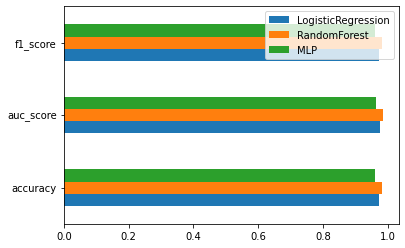

In [ ]:
score.plot(kind='barh')

## 텍스트마이닝

In [ ]:
df['total_text']=df['text'] + " " + df['title'] 
df = df[['title','text','total_text','Author_Score','Image_Score','Source_Score','contain_movies','in_out_degree','clustering_coef','user_credibility','news_type']]
df['news_type'] = pd.get_dummies(df['news_type'])['Real']
df.head()

,title,text,total_text,Author_Score,Image_Score,Source_Score,contain_movies,in_out_degree,clustering_coef,user_credibility,news_type
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...","On Saturday, September 17 at 8:30 pm EST, an e...",0.69,0.3,0.39,0,0.766990,0.178493,0.35,1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,Less than a day after protests over the police...,1.00,1.0,1.00,0,0.797183,0.082105,1.13,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",0.33,0.3,0.29,1,0.649110,0.109048,0.97,1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,Getty Images Wealth Of Nations Trump vs. Clint...,1.00,1.0,1.00,0,1.225374,0.245842,0.31,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,President Obama today vetoed a bill that would...,1.00,1.0,1.00,0,0.676302,0.112470,0.98,1


In [ ]:
X_data = df['total_text']
y_data = df['news_type']
print('기사의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

기사의 개수: 182
레이블의 개수: 182


### 전체텍스트

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=777)

In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.toarray()) 
print(X_train_dtm.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(145, 8159)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)

(145, 8159)


In [ ]:
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(tfidfv_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
X_test_dtm = vect.transform(X_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

nb_predict = nb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print(confusion_matrix(nb_predict,y_test)) #예측값과 실제값 비교
print(classification_report(nb_predict,y_test))

[[13  5]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.74      0.74      0.74        19

    accuracy                           0.73        37
   macro avg       0.73      0.73      0.73        37
weighted avg       0.73      0.73      0.73        37



In [ ]:
# Logistic Regresion을 이용해 학습/예측/평가 수행 
lr = LogisticRegression()
lr.fit(tfidfv_train, y_train)
lr_predict = lr.predict(tfidfv_test)
print(confusion_matrix(lr_predict,y_test))
print(classification_report(lr_predict,y_test))

[[12  5]
 [ 6 14]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.74      0.70      0.72        20

    accuracy                           0.70        37
   macro avg       0.70      0.70      0.70        37
weighted avg       0.70      0.70      0.70        37



In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(tfidfv_train, y_train)
rf_predict = rf.predict(tfidfv_test)
print(confusion_matrix(rf_predict,y_test))
print(classification_report(rf_predict,y_test))

[[14  4]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.79      0.79      0.79        19

    accuracy                           0.78        37
   macro avg       0.78      0.78      0.78        37
weighted avg       0.78      0.78      0.78        37



In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(tfidfv_train, y_train)
mlp_predict = mlp.predict(tfidfv_test)
print(confusion_matrix(mlp_predict,y_test))
print(classification_report(mlp_predict,y_test))

[[13  3]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.84      0.76      0.80        21

    accuracy                           0.78        37
   macro avg       0.78      0.79      0.78        37
weighted avg       0.79      0.78      0.78        37



In [ ]:
param_distribs = {"C": [0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]}
lr = LogisticRegression(penalty='l2')
lr_search = RandomizedSearchCV(lr, param_distributions=param_distribs,n_iter=10, cv=5, scoring='accuracy')
lr_search.fit(tfidfv_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.0002, 0.0005, 0.001,
                                              0.002, 0.005, 0.01, 0.02, 0.05,
                                              0.1, 0.2, 0.5, 1, 2, 5, 10, 20,
                                              50

In [ ]:
print('final params', lr_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', lr_search.best_score_)

final params {'C': 20}
best score 0.7034482758620689


In [ ]:
lr = LogisticRegression(C=20,penalty='l2')
lr.fit(tfidfv_train, y_train)
lr_predict = lr.predict(tfidfv_test)
print(confusion_matrix(lr_predict,y_test))
print(classification_report(lr_predict,y_test))

[[12  4]
 [ 6 15]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.79      0.71      0.75        21

    accuracy                           0.73        37
   macro avg       0.73      0.73      0.73        37
weighted avg       0.74      0.73      0.73        37



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distribs = {"n_estimators": sp_randint (50, 150), 
                  "max_depth": sp_randint(1, 50),
                  "max_features": sp_randint(1, 10),
                  "min_samples_split": sp_randint(2.0, 10.0),
                  "min_samples_leaf": sp_randint(1, 10),
                 }
forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, cv=5, scoring='accuracy')
rnd_search.fit(tfidfv_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('final params', rnd_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', rnd_search.best_score_)

final params {'max_depth': 35, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 127}
best score 0.689655172413793


In [ ]:
rf = rnd_search.best_estimator_
rf.fit(tfidfv_train, y_train)
rf_predict = rf.predict(tfidfv_test)
print(confusion_matrix(rf_predict,y_test))
print(classification_report(rf_predict,y_test))

[[14  3]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.84      0.80      0.82        20

    accuracy                           0.81        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.81      0.81      0.81        37



'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 19, 'n_estimators': 130}
best score 0.6689655172413793
{'max_depth': 35, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 127}
best score 0.689655172413793

In [ ]:
print(mlp.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
size_1 = [(i,) for i in range(1,300)]
param_distribs = {"hidden_layer_sizes": size_1
                 }
mlp = MLPClassifier(random_state=42)
mlp_search = RandomizedSearchCV(mlp, param_distributions=param_distribs,n_iter=10, cv=5, scoring='accuracy')
mlp_search.fit(tfidfv_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'hidden_layer_sizes': [(1,), (2,), (3,),
                                     

In [ ]:
print('final params', mlp_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', mlp_search.best_score_)

final params {'hidden_layer_sizes': (176,)}
best score 0.6758620689655173


In [ ]:
mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(176,))
mlp.fit(tfidfv_train, y_train)
mlp_predict = mlp.predict(tfidfv_test)
print(confusion_matrix(mlp_predict,y_test))
print(classification_report(mlp_predict,y_test))

[[13  3]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.84      0.76      0.80        21

    accuracy                           0.78        37
   macro avg       0.78      0.79      0.78        37
weighted avg       0.79      0.78      0.78        37



### 동사,형용사, 부사 토큰 분류

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer  

token_list = []
for text in df['total_text']:
   text = text.lower()
   tagged_list = pos_tag(WordPunctTokenizer().tokenize(text))
   t_list = [t[0] for t in tagged_list if t[1].startswith("V") or t[1].startswith("R") or t[1].startswith("J")]
   token_list.append(t_list)

df['token'] = token_list

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
final_text = []
for token_list in df['token']:
  list_to_str = " ".join(token_list)
  final_text.append(list_to_str)

df['final_text'] = final_text

In [ ]:
X_vrj_data = df['final_text']
y_vrj_data = df['news_type']
print('기사의 개수: {}'.format(len(X_vrj_data)))
print('레이블의 개수: {}'.format(len(y_vrj_data)))

기사의 개수: 182
레이블의 개수: 182


In [ ]:
from sklearn.model_selection import train_test_split
X_vrj_train, X_vrj_test, y_vrj_train, y_vrj_test = train_test_split(X_vrj_data, y_vrj_data, test_size=0.2, random_state=777)

In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
X_vrj_train_dtm = vect.fit_transform(X_vrj_train)
print(X_vrj_train_dtm.toarray()) 
print(X_vrj_train_dtm.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(145, 4316)


In [ ]:
tfidf_transformer = TfidfTransformer()
vrj_tfidfv_train = tfidf_transformer.fit_transform(X_vrj_train_dtm)
print(vrj_tfidfv_train.shape)

(145, 4316)


In [ ]:
X_vrj_test_dtm = vect.transform(X_vrj_test) #테스트 데이터를 DTM으로 변환
vrj_tfidfv_test = tfidf_transformer.transform(X_vrj_test_dtm) #DTM을 TF-IDF 행렬로 변환
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(vrj_tfidfv_train, y_vrj_train)
vrj_nb_predict = nb.predict(vrj_tfidfv_test) #테스트 데이터에 대한 예측
print(confusion_matrix(vrj_nb_predict,y_vrj_test)) #예측값과 실제값 비교
print(classification_report(vrj_nb_predict,y_vrj_test))

[[13  2]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.89      0.77      0.83        22

    accuracy                           0.81        37
   macro avg       0.81      0.82      0.81        37
weighted avg       0.82      0.81      0.81        37



In [ ]:
# Logistic Regresion을 이용해 학습/예측/평가 수행 
lr = LogisticRegression()
lr.fit(vrj_tfidfv_train, y_vrj_train)
vrj_lr_predict = lr.predict(vrj_tfidfv_test)
print(confusion_matrix(vrj_lr_predict,y_vrj_test))
print(classification_report(vrj_lr_predict,y_vrj_test))

[[14  2]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.81      0.85        21

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(vrj_tfidfv_train, y_vrj_train)
vrj_rf_predict = rf.predict(vrj_tfidfv_test)
print(confusion_matrix(vrj_rf_predict,y_vrj_test))
print(classification_report(vrj_rf_predict,y_vrj_test))

[[15  4]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.79      0.83      0.81        18

    accuracy                           0.81        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.81      0.81      0.81        37



In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(vrj_tfidfv_train, y_vrj_train)
vrj_mlp_predict = mlp.predict(vrj_tfidfv_test)
print(confusion_matrix(vrj_mlp_predict,y_vrj_test))
print(classification_report(vrj_mlp_predict,y_vrj_test))

[[13  3]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.84      0.76      0.80        21

    accuracy                           0.78        37
   macro avg       0.78      0.79      0.78        37
weighted avg       0.79      0.78      0.78        37



In [ ]:
param_distribs = {"C": [0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000,2000,5000,10000]}
lr = LogisticRegression()
lr_search = RandomizedSearchCV(lr, param_distributions=param_distribs,n_iter=10, cv=5, scoring='accuracy')
lr_search.fit(vrj_tfidfv_train,y_vrj_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.0002, 0.0005, 0.001,
                                              0.002, 0.005, 0.01, 0.02, 0.05,
                                              0.1, 0.2, 0.5, 1, 2, 5, 10, 20,
                                              50

In [ ]:
print('final params', lr_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', lr_search.best_score_)

final params {'C': 10}
best score 0.7241379310344828


In [ ]:
lr = LogisticRegression(C=5,penalty='l2')
lr.fit(vrj_tfidfv_train, y_vrj_train)
vrj_lr_predict = lr.predict(vrj_tfidfv_test)
print(confusion_matrix(vrj_lr_predict,y_vrj_test))
print(classification_report(vrj_lr_predict,y_vrj_test))

[[14  2]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.81      0.85        21

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distribs = {"n_estimators": sp_randint (50, 250), 
                  "max_depth": [4],
                  "max_features": sp_randint(1, 30),
                  "min_samples_split": [2],
                  "min_samples_leaf": [1]
                 }
forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10, cv=5, scoring='accuracy')
rnd_search.fit(vrj_tfidfv_train,y_vrj_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('final params', rnd_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', rnd_search.best_score_)

final params {'max_depth': 4, 'max_features': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 154}
best score 0.7172413793103448


In [ ]:
rf = RandomForestClassifier(random_state=42,max_depth= 4, max_features= 23, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 147)
rf.fit(vrj_tfidfv_train, y_vrj_train)
vrj_rf_predict = rf.predict(vrj_tfidfv_test)
print(confusion_matrix(vrj_rf_predict,y_vrj_test))
print(classification_report(vrj_rf_predict,y_vrj_test))

[[16  3]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.84      0.89      0.86        18

    accuracy                           0.86        37
   macro avg       0.87      0.87      0.86        37
weighted avg       0.87      0.86      0.86        37



final params {'max_depth': 4, 'max_features': 46, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 89}
best score 0.7034482758620688
final params {'max_depth': 4, 'max_features': 27, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 88}
best score 0.7310344827586206
final params {'max_depth': 4, 'max_features': 23, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 147}
best score 0.7379310344827585

In [ ]:
param_distribs = {"hidden_layer_sizes": size_1
                 }
mlp = MLPClassifier(random_state=42)
mlp_search = RandomizedSearchCV(mlp, param_distributions=param_distribs,n_iter=10, cv=5, scoring='accuracy')
mlp_search.fit(vrj_tfidfv_train,y_vrj_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'hidden_layer_sizes': [(1,), (2,), (3,),
                                     

In [ ]:
print('final params', mlp_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', mlp_search.best_score_)

final params {'hidden_layer_sizes': (296,)}
best score 0.6758620689655173


In [ ]:
mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(296,))
mlp.fit(vrj_tfidfv_train, y_vrj_train)
vrj_mlp_predict = mlp.predict(vrj_tfidfv_test)
print(confusion_matrix(vrj_mlp_predict,y_vrj_test))
print(classification_report(vrj_mlp_predict,y_vrj_test))

[[13  3]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.84      0.76      0.80        21

    accuracy                           0.78        37
   macro avg       0.78      0.79      0.78        37
weighted avg       0.79      0.78      0.78        37



In [ ]:
 result = pd.DataFrame(index=['NB', 'LR', 'RF', 'MLP'])
result_list = [accuracy_score(y_test, nb_predict),accuracy_score(y_test, lr_predict),accuracy_score(y_test, rf_predict),accuracy_score(y_test, mlp_predict)]
vrj_result_list = [accuracy_score(y_vrj_test, vrj_nb_predict),accuracy_score(y_vrj_test, vrj_lr_predict),accuracy_score(y_vrj_test, vrj_rf_predict),accuracy_score(y_vrj_test, vrj_mlp_predict)]

result['all text'] = result_list
result['VRJ token'] = vrj_result_list
result

,all text,VRJ token
NB,0.729730,0.810811
LR,0.729730,0.837838
RF,0.810811,0.864865
MLP,0.783784,0.783784


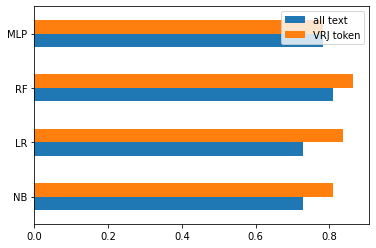

In [ ]:
result.plot(kind='barh')

# **Reference**

자연어 처리 https://skyjwoo.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-EDAExploratory-Data-Analysis

자연어 처리: https://wikidocs.net/47193

캐글 classification: https://www.kaggle.com/sohamohajeri/buzzfeed-news-analysis-and-classification/comments
https://www.kaggle.com/kumudchauhan/fake-news-analysis-and-classification